<a href="https://colab.research.google.com/github/k3vok/AI-course/blob/main/PE_sectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "/content/PE SEC.xlsx"
data = pd.read_excel(file_path)

# Check the first few rows of the dataset
print(data.head())


        Date  PE Ratio: Saudi Exchange  PE Ratio: Saudi Exchange: Energy  \
0 2017-11-01                    14.903                            12.976   
1 2017-12-01                    15.147                            14.431   
2 2018-01-01                    16.069                            15.817   
3 2018-02-01                    15.644                            17.333   
4 2018-03-01                    16.758                            18.148   

   PE Ratio: Saudi Exchange: Materials  \
0                               17.524   
1                               17.925   
2                               19.037   
3                               18.517   
4                               20.288   

   PE Ratio: Saudi Exchange: Capital Goods  \
0                                   16.186   
1                                   17.024   
2                                   17.129   
3                                   16.466   
4                                   17.107   

   PE Ratio: 

In [2]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)


In [3]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values using forward fill (or choose another method like interpolation)
data.fillna(method='ffill', inplace=True)


PE Ratio: Saudi Exchange                                             0
PE Ratio: Saudi Exchange: Energy                                     0
PE Ratio: Saudi Exchange: Materials                                  0
PE Ratio: Saudi Exchange: Capital Goods                              0
PE Ratio: Saudi Exchange: Commercial and Professional Services       0
PE Ratio: Saudi Exchange: Transportation                             0
PE Ratio: Saudi Exchange: Consumer Durables and Apparel              0
PE Ratio: Saudi Exchange: Consumer Services                          0
PE Ratio: Saudi Exchange: Media                                      0
PE Ratio: Saudi Exchange: Retailing                                  0
PE Ratio: Saudi Exchange: Food and Staples Retailing                 0
PE Ratio: Saudi Exchange: Food and Beverages                         0
PE Ratio: Saudi Exchange: Household and Personal Products           83
PE Ratio: Saudi Exchange: Health Care Equipment and Services         0
PE Rat

<ipython-input-3-24d6d510b89e>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


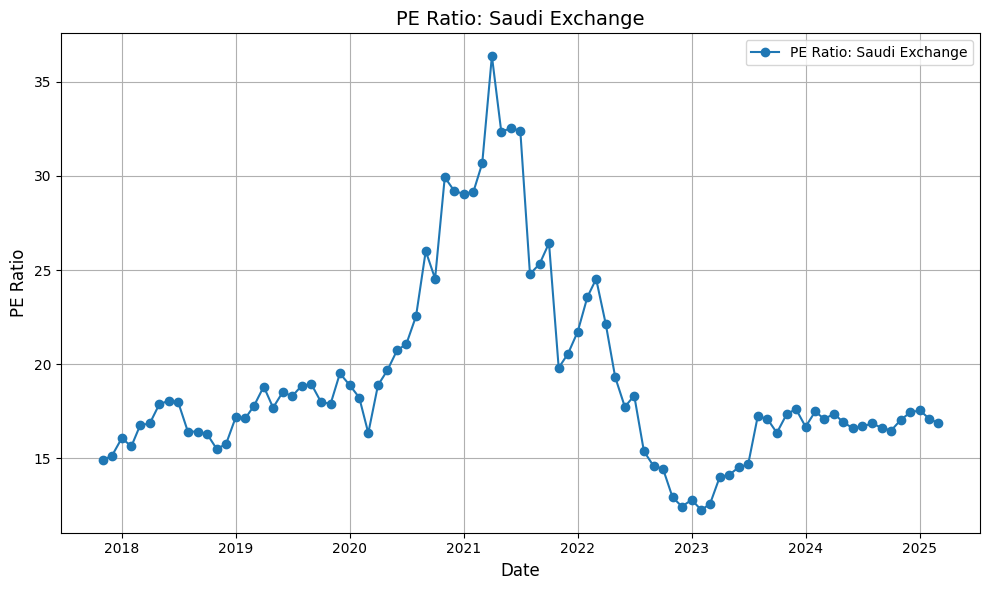

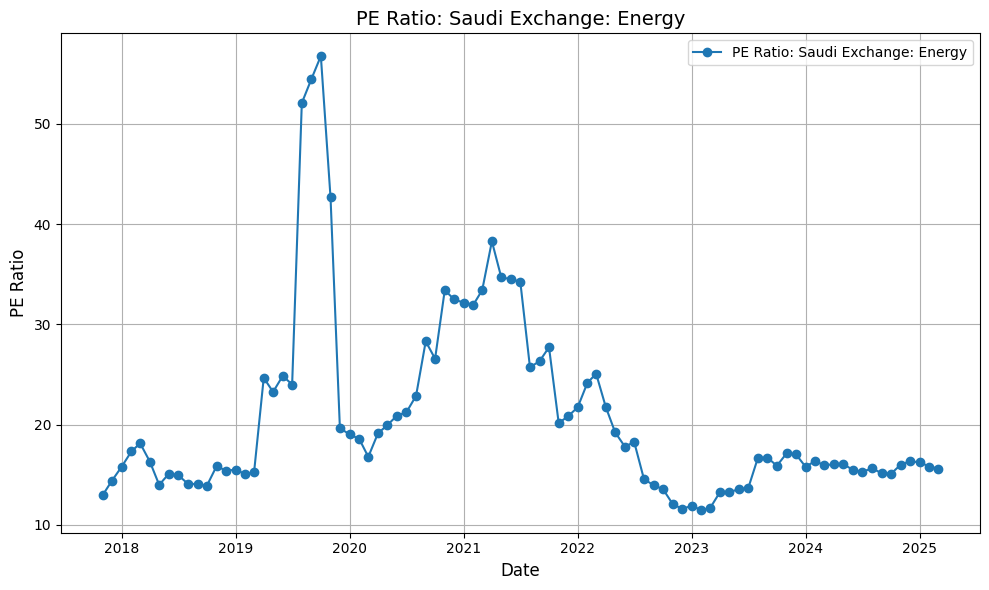

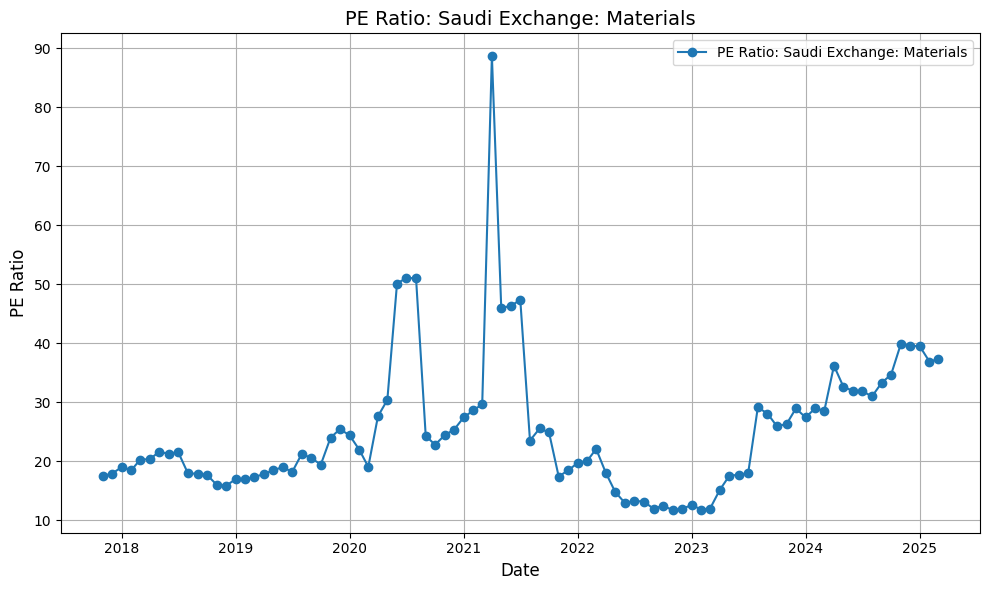

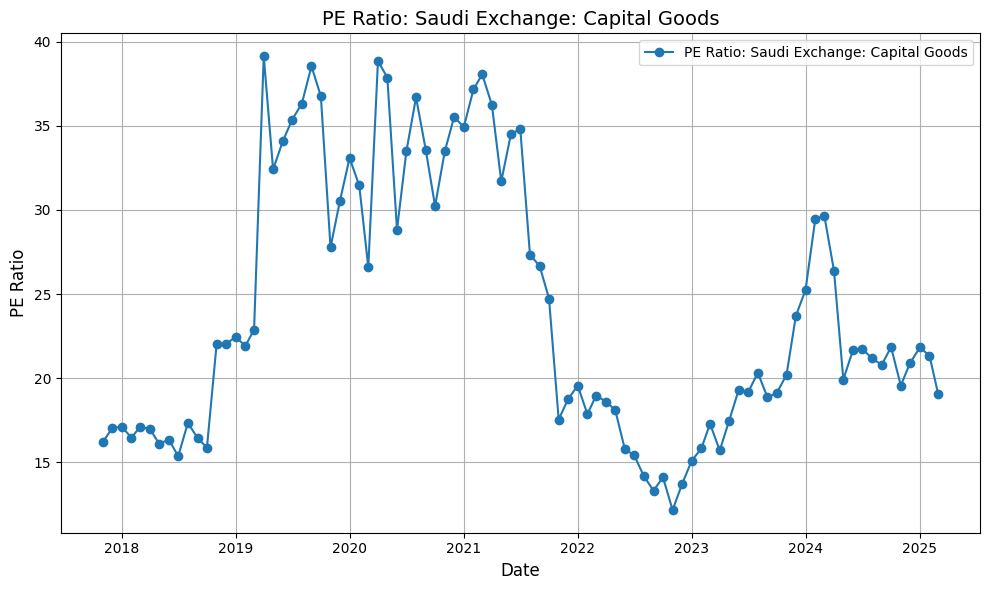

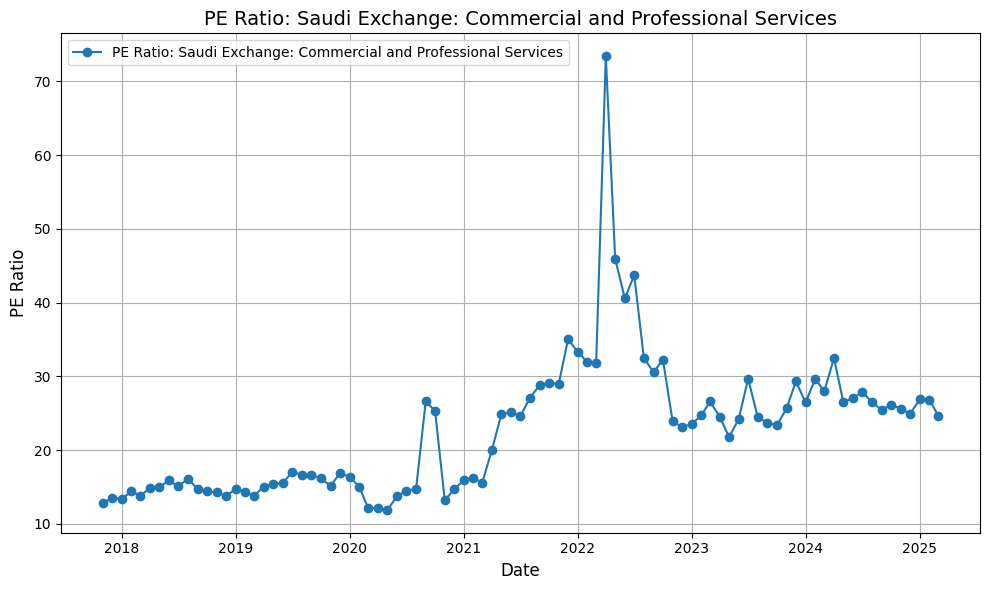

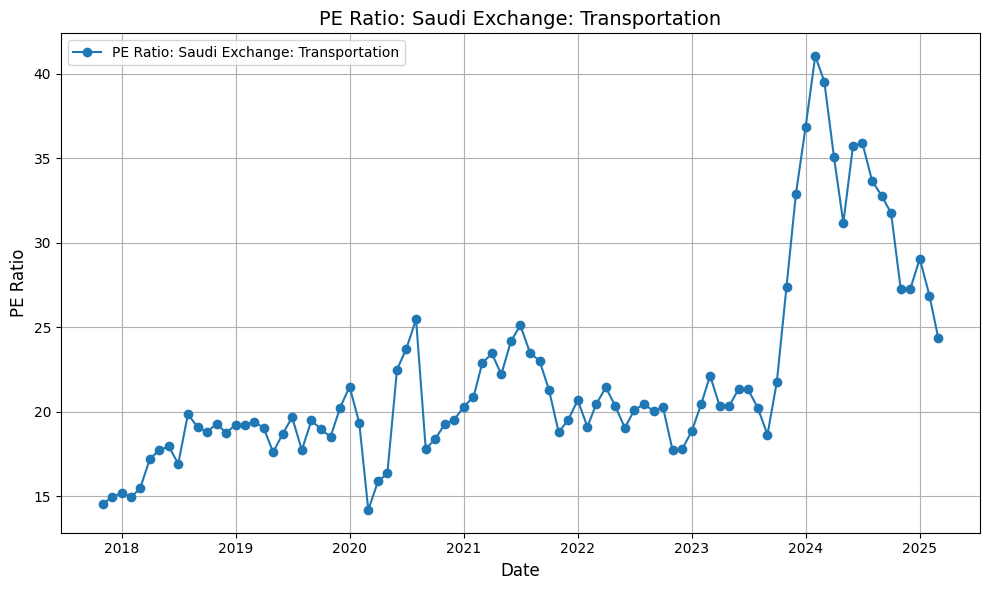

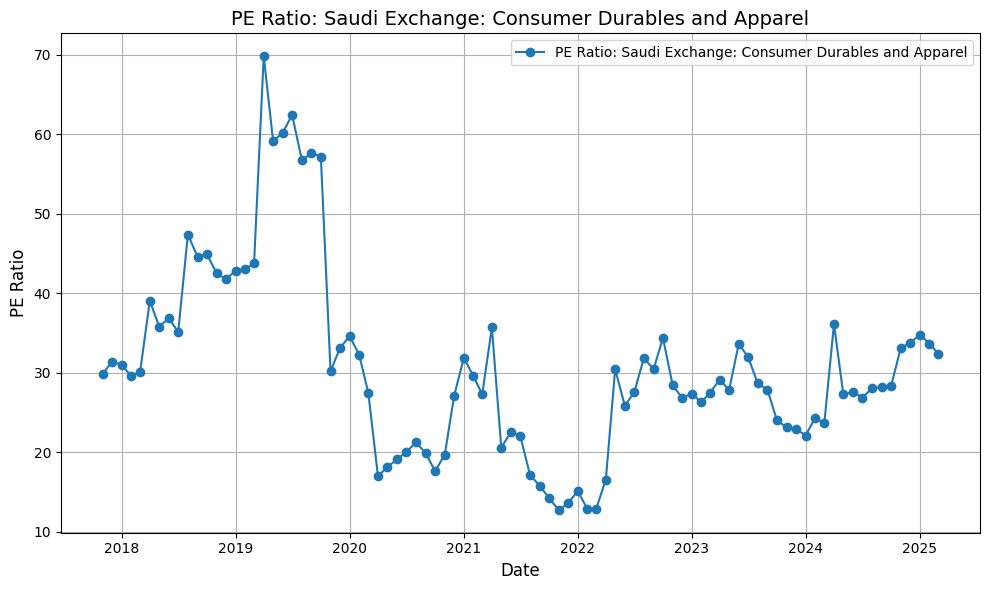

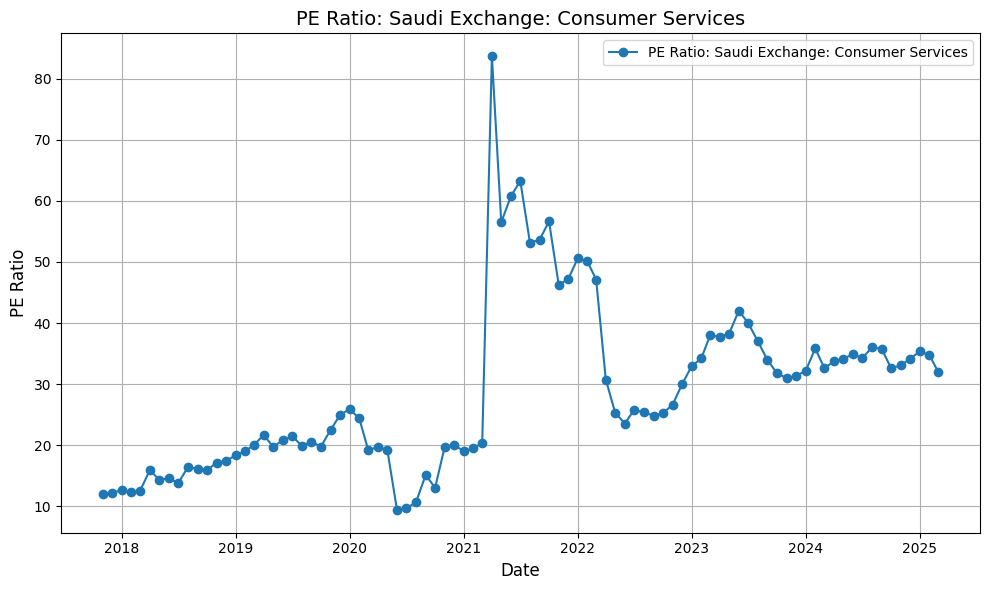

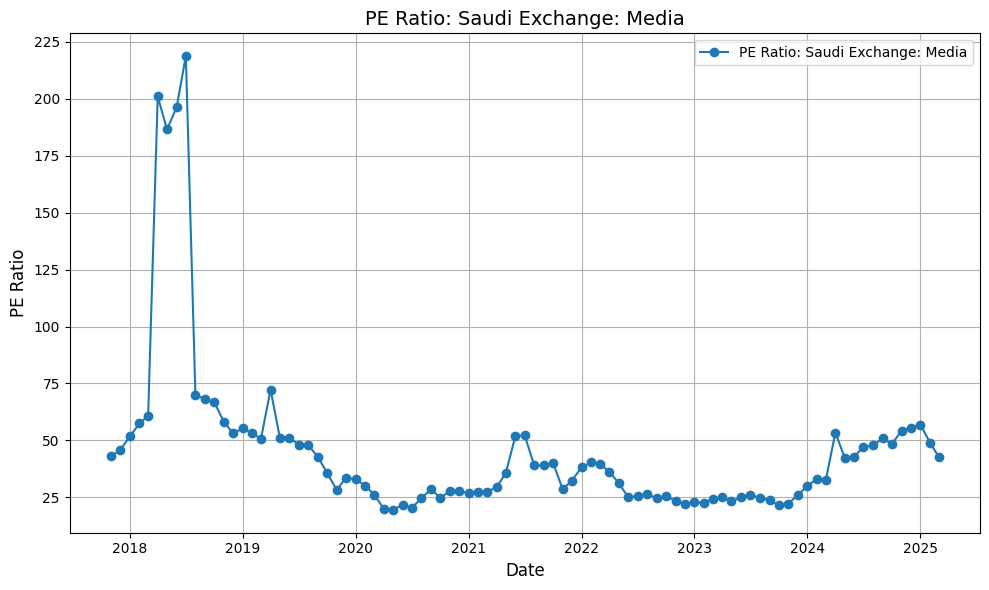

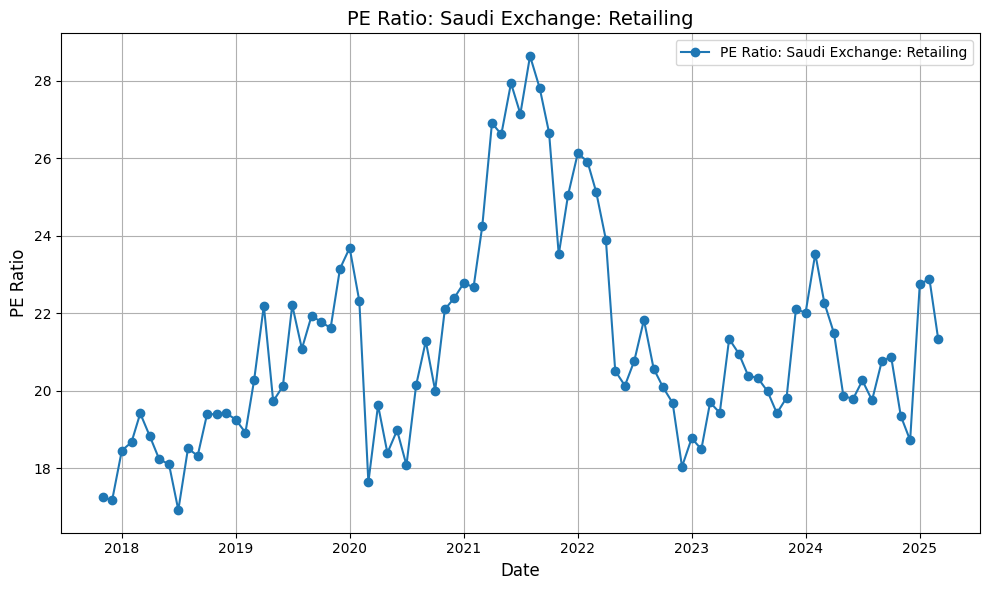

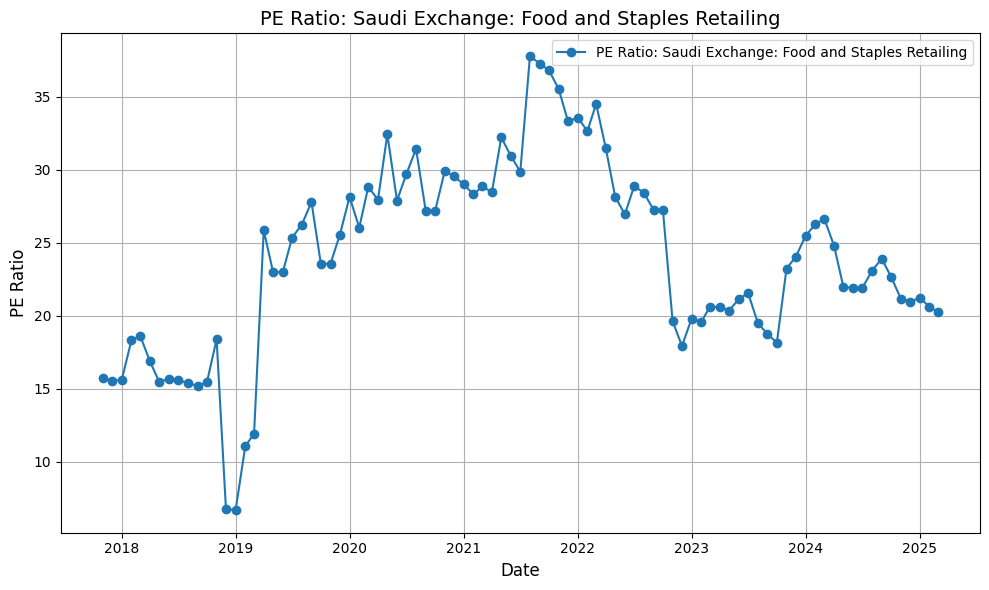

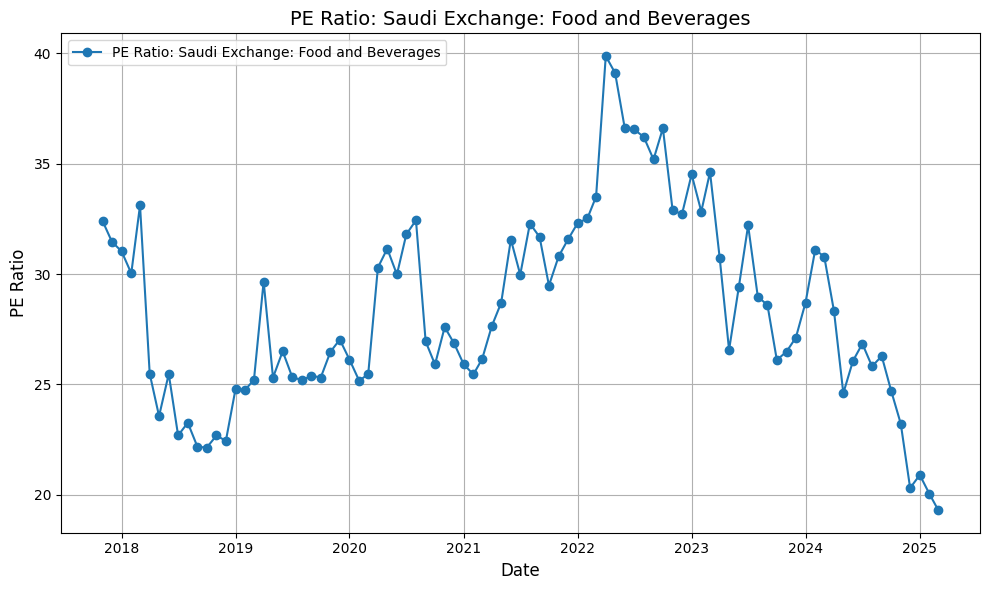

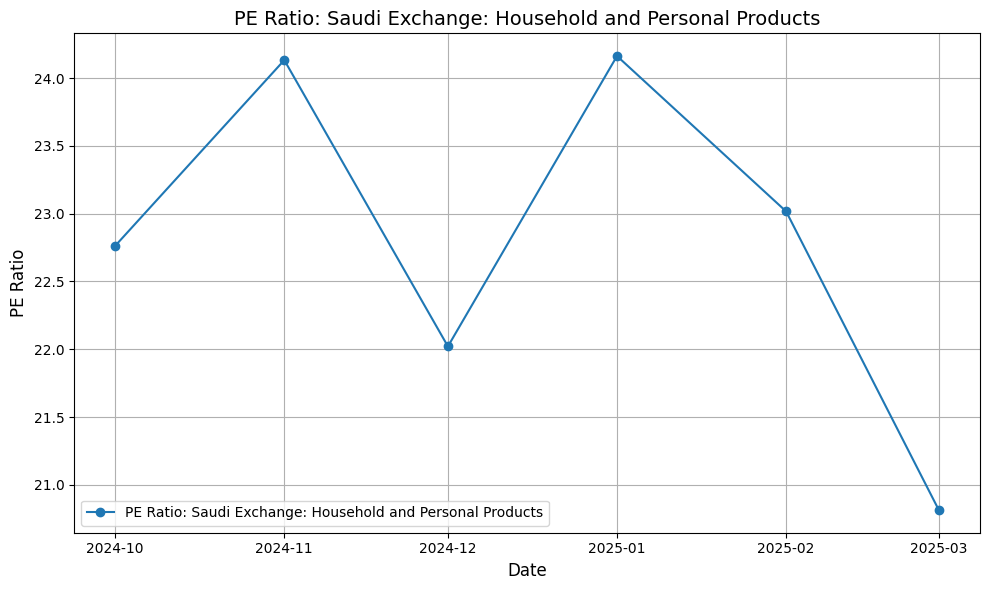

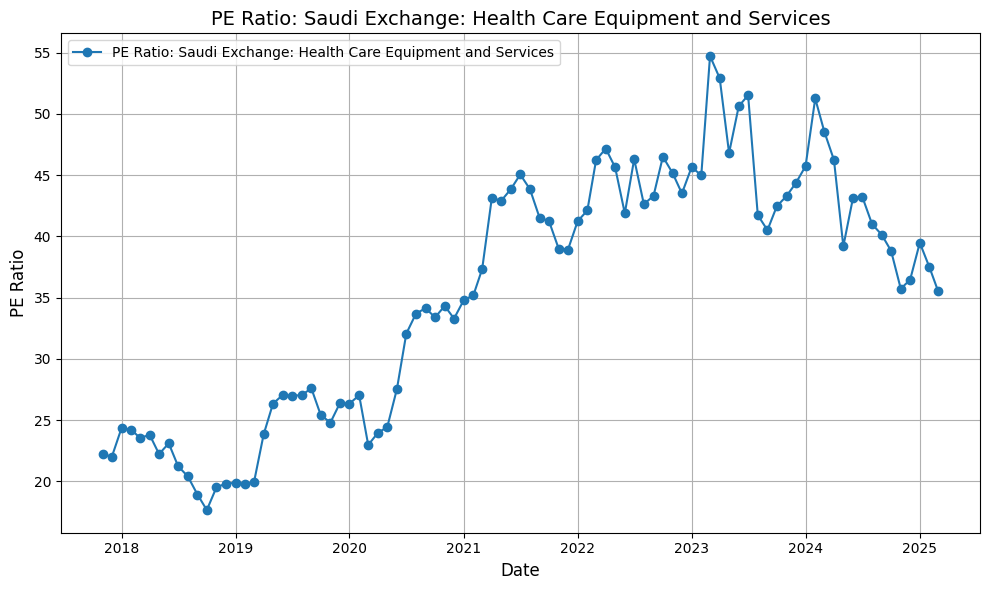

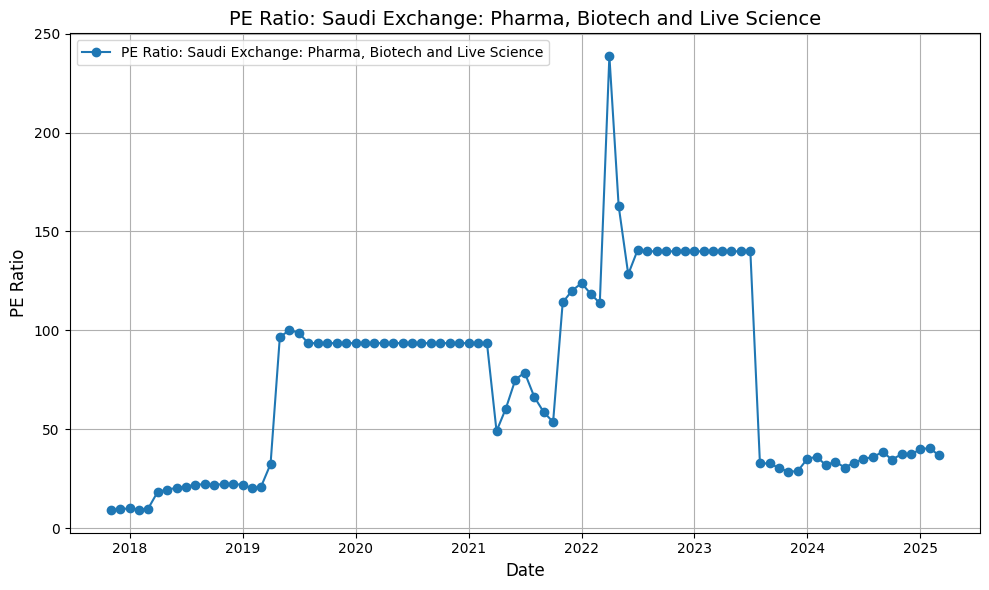

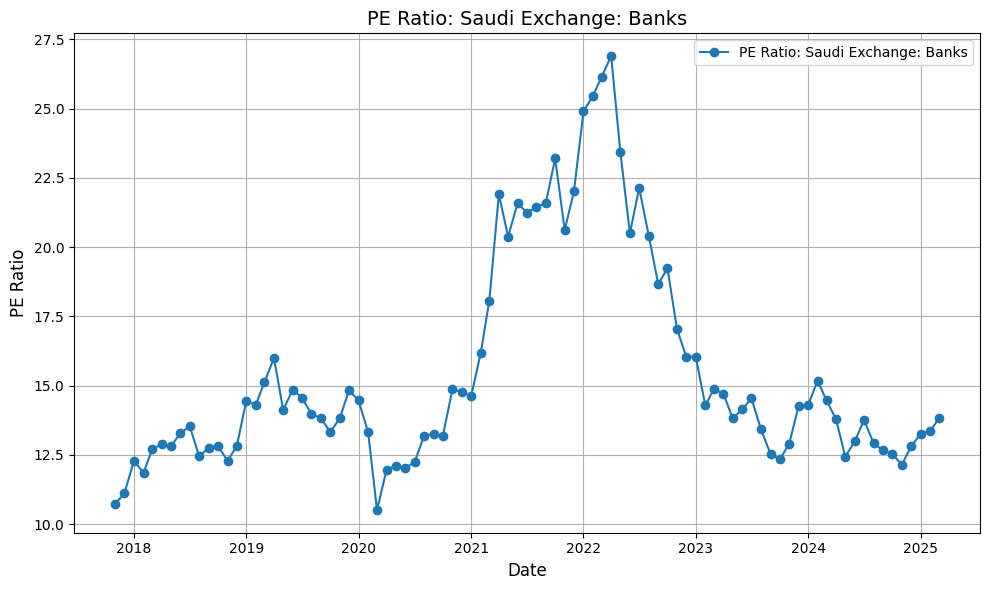

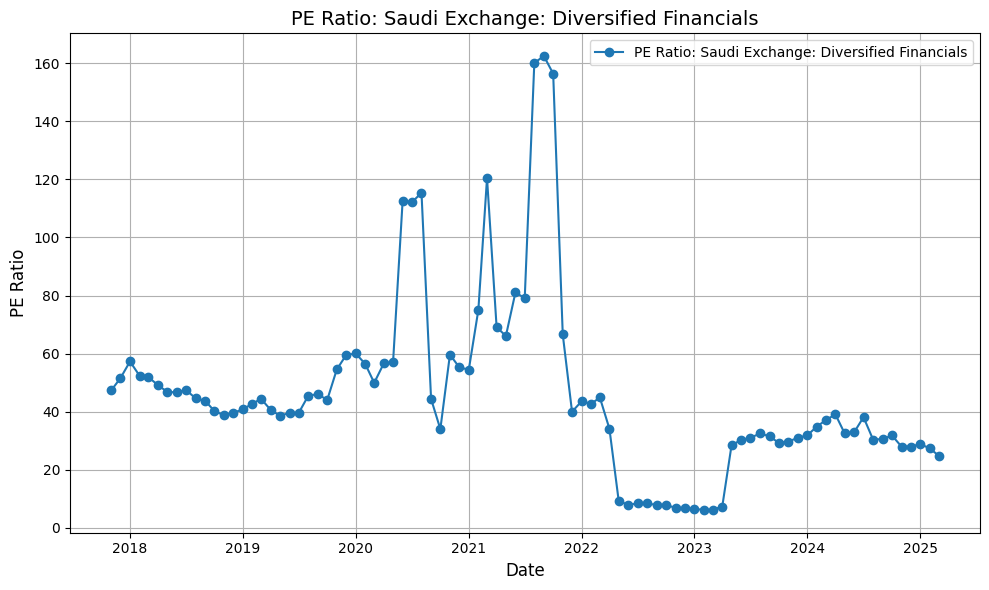

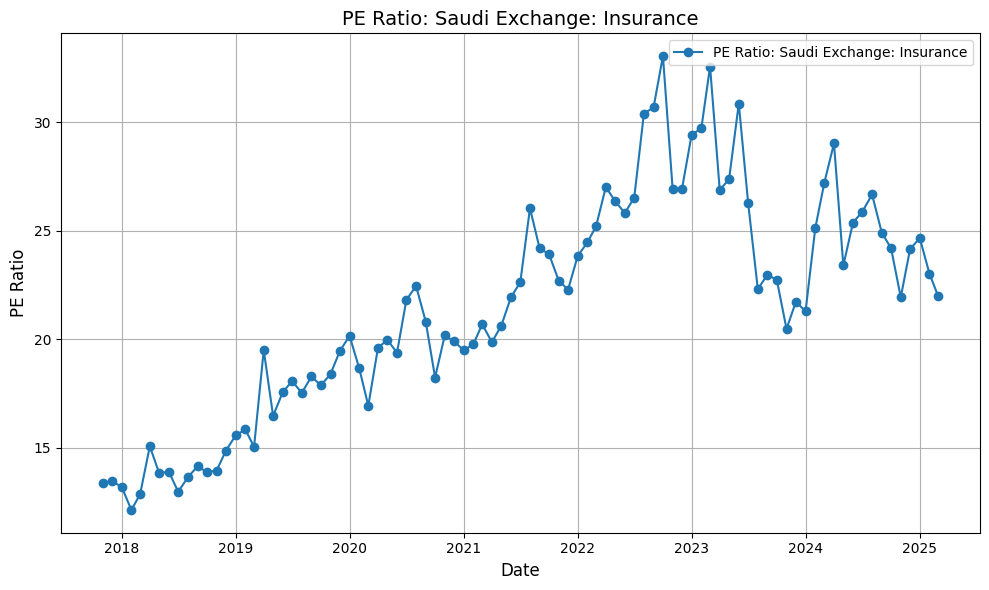

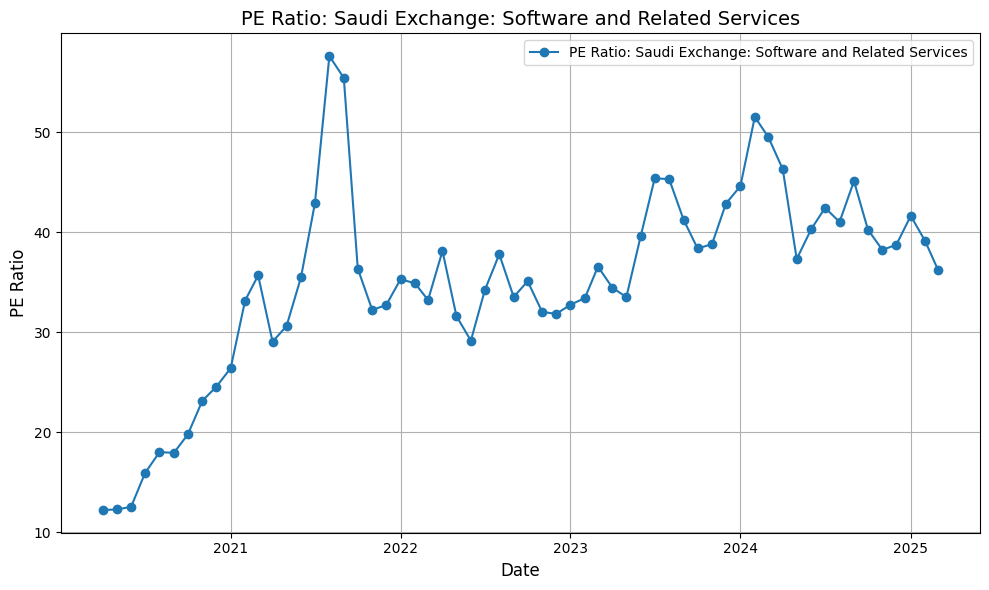

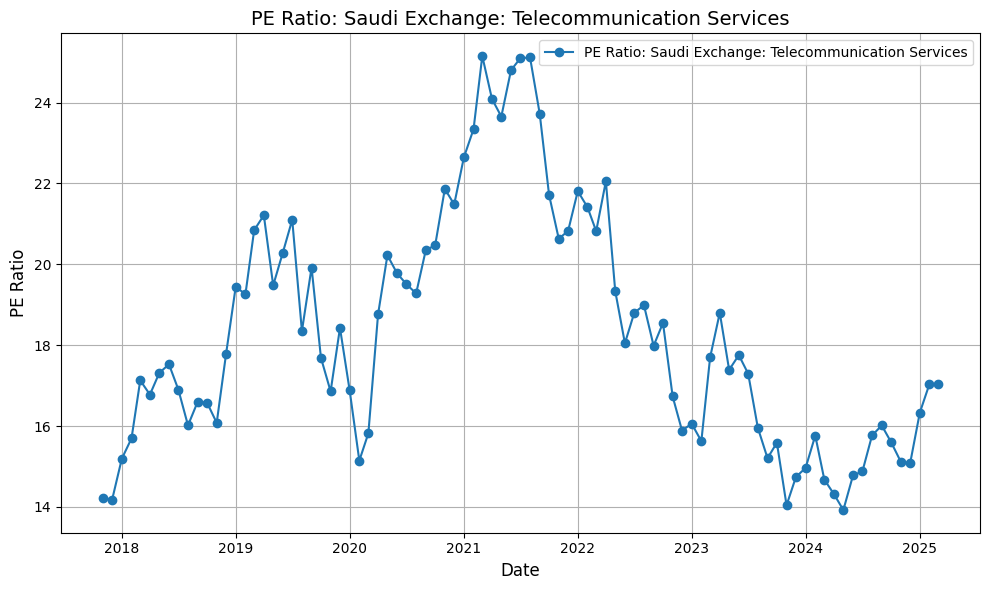

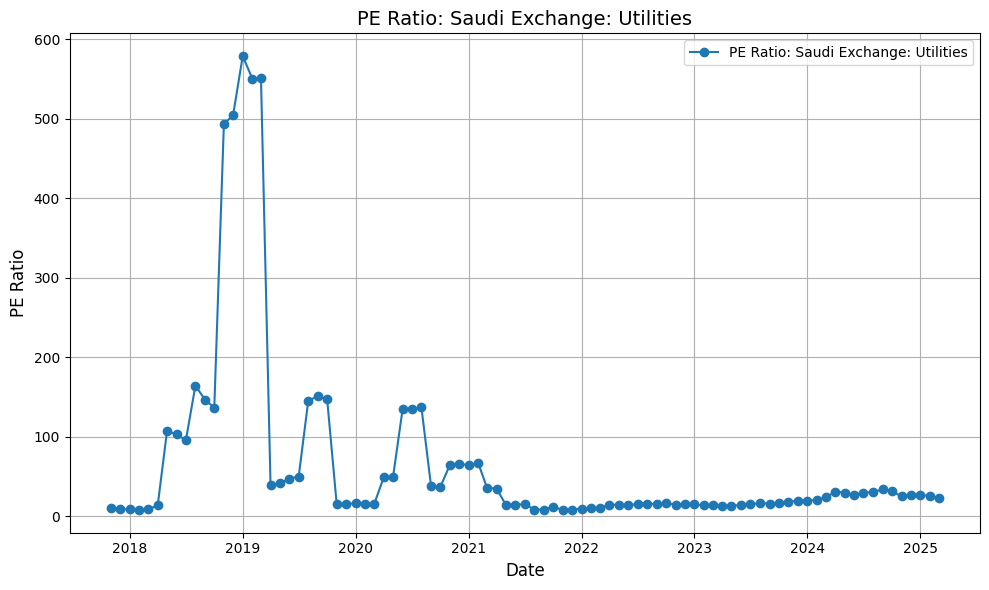

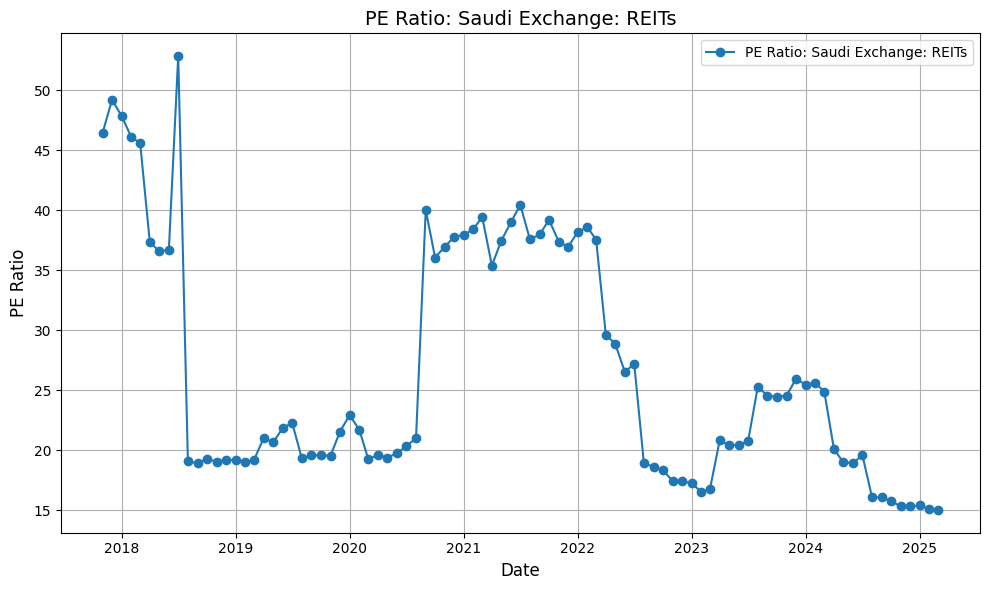

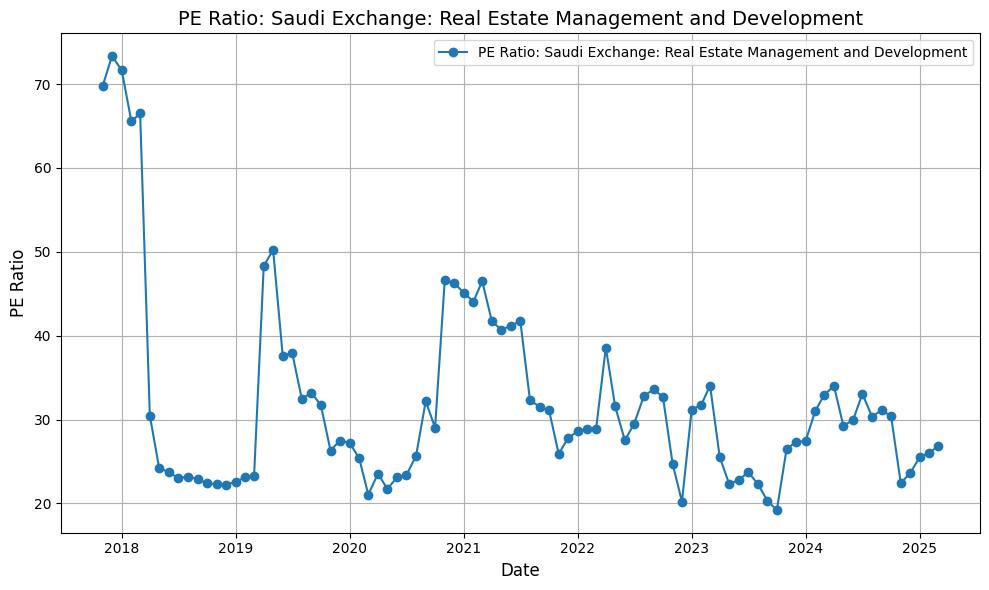

In [4]:
# Plot each column in individual line charts
for column in data.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[column], label=column, marker='o')
    plt.title(column, fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("PE Ratio", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [5]:

# Calculate historical highs and lows
highs = data.max()  # Max for each sector
lows = data.min()   # Min for each sector

# Get the most recent P/E values (last row in the dataset)
current_values = data.iloc[-1]


In [6]:
# Calculate proximity to highs (as percentage)
proximity_to_highs = (current_values / highs) * 100

# Calculate proximity to lows (scaled between 0% and 100%)
proximity_to_lows = ((current_values - lows) / (highs - lows)) * 100


In [37]:
# Define thresholds
high_threshold = 70  # Close to historical highs (overvalued)
low_threshold = 30   # Close to historical lows (undervalued)

# Filter sectors
near_highs = proximity_to_highs[proximity_to_highs > high_threshold]
near_lows = proximity_to_lows[proximity_to_lows < low_threshold]

# Display results
print("\nSectors Near Historical Highs:\n", near_highs)
print("\nSectors Near Historical Lows:\n", near_lows)



Sectors Near Historical Highs:
 PE Ratio: Saudi Exchange: Retailing                          74.480495
PE Ratio: Saudi Exchange: Household and Personal Products    86.139966
dtype: float64

Sectors Near Historical Lows:
 PE Ratio: Saudi Exchange                                            19.160236
PE Ratio: Saudi Exchange: Energy                                     9.123830
PE Ratio: Saudi Exchange: Capital Goods                             25.500371
PE Ratio: Saudi Exchange: Commercial and Professional Services      20.744145
PE Ratio: Saudi Exchange: Media                                     11.741636
PE Ratio: Saudi Exchange: Food and Beverages                         0.000000
PE Ratio: Saudi Exchange: Household and Personal Products            0.000000
PE Ratio: Saudi Exchange: Pharma, Biotech and Live Science          12.018787
PE Ratio: Saudi Exchange: Banks                                     20.159863
PE Ratio: Saudi Exchange: Diversified Financials                    11.97423

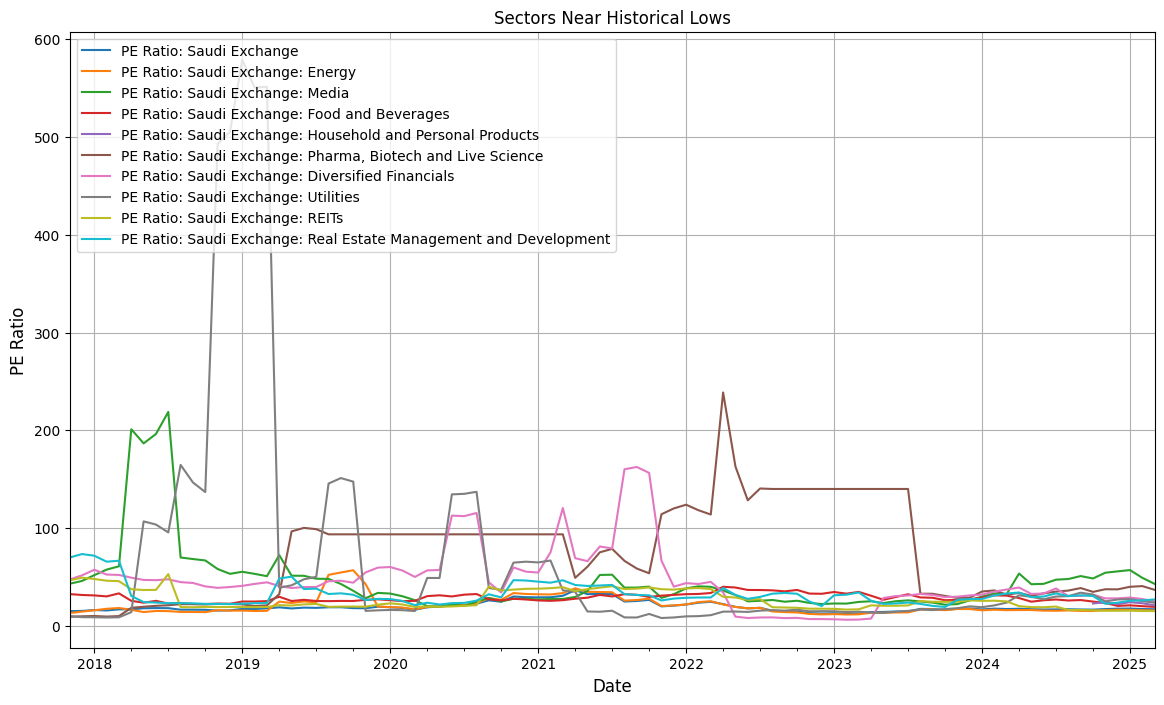

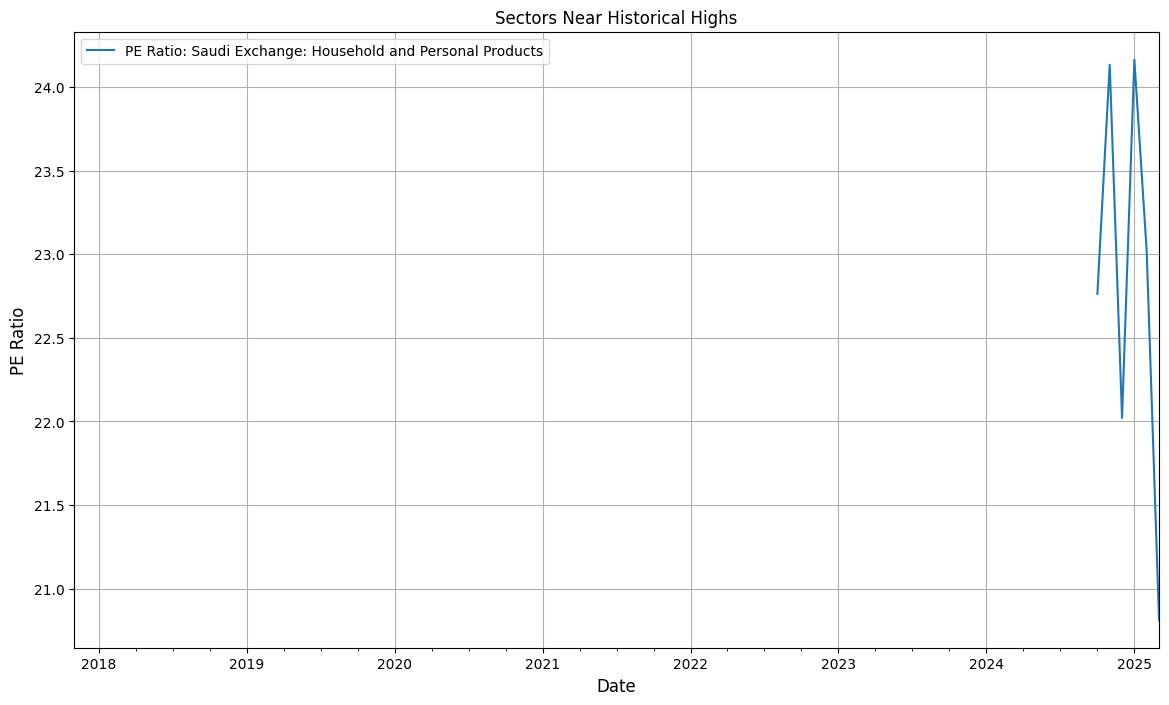

In [8]:
# Plot sectors near lows
if not near_lows.empty:
    data[near_lows.index].plot(figsize=(14, 8), title="Sectors Near Historical Lows")
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("PE Ratio", fontsize=12)
    plt.legend(loc="upper left", fontsize=10)
    plt.grid(True)
    plt.show()

# Plot sectors near highs
if not near_highs.empty:
    data[near_highs.index].plot(figsize=(14, 8), title="Sectors Near Historical Highs")
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("PE Ratio", fontsize=12)
    plt.legend(loc="upper left", fontsize=10)
    plt.grid(True)
    plt.show()


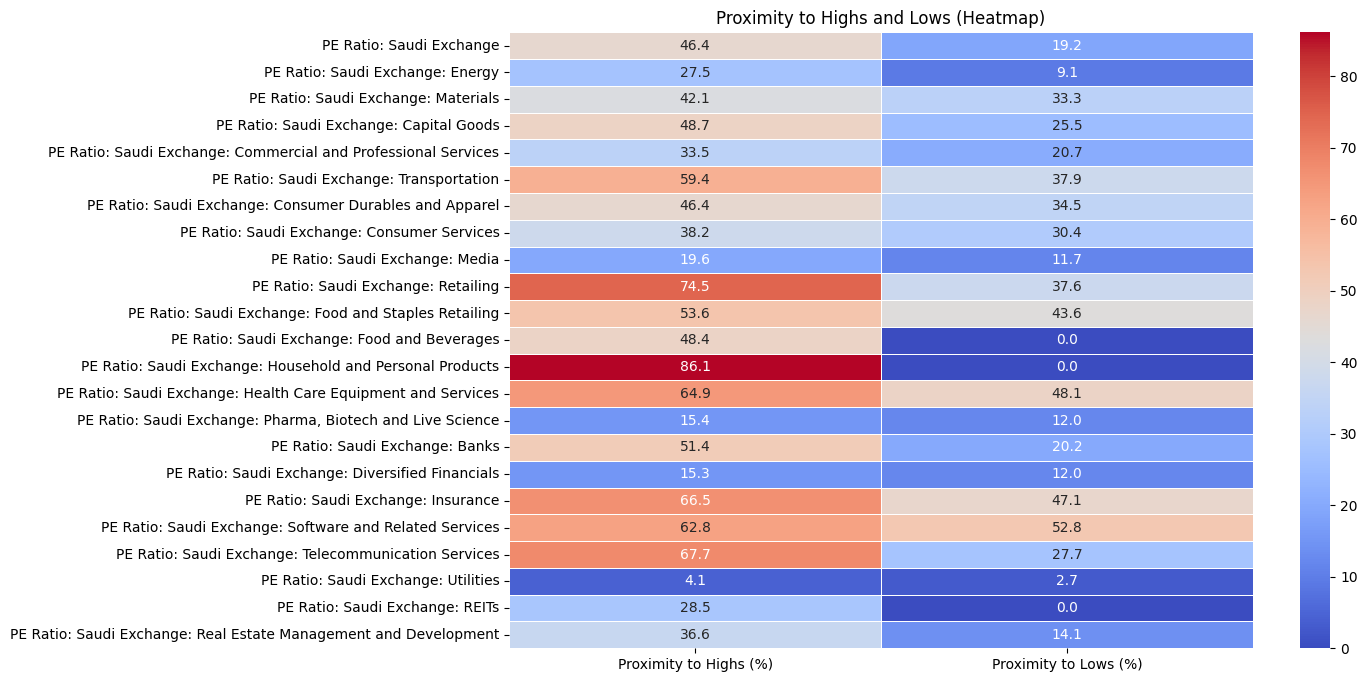

In [9]:
import seaborn as sns

# Combine proximity metrics into a DataFrame
proximity_df = pd.DataFrame({
    "Proximity to Highs (%)": proximity_to_highs,
    "Proximity to Lows (%)": proximity_to_lows
})

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(proximity_df, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("Proximity to Highs and Lows (Heatmap)")
plt.show()


In [10]:
pip install pandas matplotlib requests seaborn statsmodels

In [11]:
import requests
import pandas as pd
import json

In [12]:
# API URL
url = "https://api.datasaudi.sa/tesseract/data.jsonrecords"
params = {
    "cube": "tadawul_indicators",
    "locale": "en",
    "drilldowns": "Indicator,Month",
    "measures": "Value",
    "include": "Indicator:2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,25",
    "limit": "3000,0"
}

# Fetch data from API
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    print("Data fetched successfully!")
    data = response.json()  # Parse JSON response
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")
    exit()

Data fetched successfully!


In [13]:
# Extract data records from the JSON response
records = data["data"]

# Convert the records into a DataFrame
df = pd.DataFrame(records)

# Preview the data
print(df.head())


     Value  Month ID    Month  Indicator ID                 Indicator
0  4359.16    201601  2016-01             2                    Energy
1  3903.74    201601  2016-01             3                 Materials
2  3495.84    201601  2016-01             4             Capital Goods
3  5001.96    201601  2016-01             5  Commercial/Prof Services
4  3593.76    201601  2016-01             6            Transportation


In [14]:
# Convert 'Month' column to datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Rename columns for clarity
df.rename(columns={"Indicator": "Sector", "Value": "Market Value"}, inplace=True)

# Preview cleaned data
print(df.head())


   Market Value  Month ID      Month  Indicator ID                    Sector
0       4359.16    201601 2016-01-01             2                    Energy
1       3903.74    201601 2016-01-01             3                 Materials
2       3495.84    201601 2016-01-01             4             Capital Goods
3       5001.96    201601 2016-01-01             5  Commercial/Prof Services
4       3593.76    201601 2016-01-01             6            Transportation


In [15]:
# Save the cleaned data to a CSV file
output_file = "saudi_sector_market_data.csv"
df.to_csv(output_file, index=False)

print(f"Data saved successfully to {output_file}")


Data saved successfully to saudi_sector_market_data.csv


In [16]:
# Ensure 'Month' is in datetime format for proper handling
df['Month'] = pd.to_datetime(df['Month'])

# Pivot the DataFrame to reshape it (all months, all sectors)
reshaped_df = df.pivot(index="Month", columns="Sector", values="Market Value")

# Reset the index to include 'Month' as a column
reshaped_df.reset_index(inplace=True)

# Fill missing values with 0 or interpolate as necessary
reshaped_df.fillna(0, inplace=True)  # Replace NaN with 0
# Alternatively, use interpolation if data gaps need smoothing:
# reshaped_df.interpolate(method="linear", inplace=True)

# Save the reshaped data to a CSV file
output_file = "reshaped_saudi_sector_data_full.csv"
reshaped_df.to_csv(output_file, index=False)

print(f"Reshaped data (full range) saved successfully to {output_file}")


Reshaped data (full range) saved successfully to reshaped_saudi_sector_data_full.csv


In [18]:
# Generate a full date range from Jan 2016 to Dec 2024
full_date_range = pd.date_range(start="2016-01-01", end="2025-03-01", freq="MS")  # MS = Month Start

# Check if all months are present in the data
missing_months = set(full_date_range) - set(reshaped_df['Month'])
if missing_months:
    print("Missing months:", missing_months)
else:
    print("No months are missing!")


Missing months: {Timestamp('2025-03-01 00:00:00')}


In [19]:
!pip install openpyxl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:


# Load the P/E Ratio data
pe_data = pd.read_excel("PE SEC.xlsx", engine='openpyxl') # Use pd.read_excel with the openpyxl engine

# Load the reshaped sector market data
market_data = pd.read_csv("reshaped_saudi_sector_data_full.csv")

# Preview the data
print(pe_data.head())
print(market_data.head())

        Date  PE Ratio: Saudi Exchange  PE Ratio: Saudi Exchange: Energy  \
0 2017-11-01                    14.903                            12.976   
1 2017-12-01                    15.147                            14.431   
2 2018-01-01                    16.069                            15.817   
3 2018-02-01                    15.644                            17.333   
4 2018-03-01                    16.758                            18.148   

   PE Ratio: Saudi Exchange: Materials  \
0                               17.524   
1                               17.925   
2                               19.037   
3                               18.517   
4                               20.288   

   PE Ratio: Saudi Exchange: Capital Goods  \
0                                   16.186   
1                                   17.024   
2                                   17.129   
3                                   16.466   
4                                   17.107   

   PE Ratio: 

In [21]:
# Convert 'Date' in P/E data and 'Month' in market data to datetime format
pe_data['Date'] = pd.to_datetime(pe_data['Date'])
market_data['Month'] = pd.to_datetime(market_data['Month'])

# Rename 'Month' in market data to 'Date' for consistent column naming
market_data.rename(columns={'Month': 'Date'}, inplace=True)


In [22]:
# Merge P/E data and market data on 'Date'
merged_data = pd.merge(pe_data, market_data, on='Date', how='inner')

# Preview the merged dataset
print(merged_data.head())


        Date  PE Ratio: Saudi Exchange  PE Ratio: Saudi Exchange: Energy  \
0 2017-11-01                    14.903                            12.976   
1 2017-12-01                    15.147                            14.431   
2 2018-01-01                    16.069                            15.817   
3 2018-02-01                    15.644                            17.333   
4 2018-03-01                    16.758                            18.148   

   PE Ratio: Saudi Exchange: Materials  \
0                               17.524   
1                               17.925   
2                               19.037   
3                               18.517   
4                               20.288   

   PE Ratio: Saudi Exchange: Capital Goods  \
0                                   16.186   
1                                   17.024   
2                                   17.129   
3                                   16.466   
4                                   17.107   

   PE Ratio: 

In [23]:
# Define the mapping of P/E ratio columns to sector columns
column_mapping = {
    "PE Ratio: Saudi Exchange: Energy": "Energy",
    "PE Ratio: Saudi Exchange: Materials": "Materials",
    "PE Ratio: Saudi Exchange: Capital Goods": "Capital Goods",
    "PE Ratio: Saudi Exchange: Commercial and Professional Services": "Commercial/Prof Services",
    "PE Ratio: Saudi Exchange: Transportation": "Transportation",
    "PE Ratio: Saudi Exchange: Consumer Durables and Apparel": "Consumer Durables/Apparel",
    "PE Ratio: Saudi Exchange: Consumer Services": "Consumer Services",
    "PE Ratio: Saudi Exchange: Media": "Media & Entertainment",
    "PE Ratio: Saudi Exchange: Retailing": "Retailing",
    "PE Ratio: Saudi Exchange: Food and Staples Retailing": "Food & Staples Retailing",
    "PE Ratio: Saudi Exchange: Food and Beverages": "Food & Beverage",
    "PE Ratio: Saudi Exchange: Household and Personal Products": "Household & Personal Products",
    "PE Ratio: Saudi Exchange: Health Care Equipment and Services": "Health Care Equipment/Svcs",
    "PE Ratio: Saudi Exchange: Pharma, Biotech and Live Science": "Pharm/Biotech/Life Science",
    "PE Ratio: Saudi Exchange: Banks": "Banks",
    "PE Ratio: Saudi Exchange: Diversified Financials": "Diversified Financials",
    "PE Ratio: Saudi Exchange: Insurance": "Insurance",
    "PE Ratio: Saudi Exchange: Software and Related Services": "Software and Services",
    "PE Ratio: Saudi Exchange: Telecommunication Services": "Telecommunication Services",
    "PE Ratio: Saudi Exchange: Utilities": "Utilities",
    "PE Ratio: Saudi Exchange: REITs": "REITs",
    "PE Ratio: Saudi Exchange: Real Estate Management and Development": "Real Estate Mgmt/Developmt"
}


In [24]:
# Extract relevant columns: 'Date', P/E columns, and sector market value columns
pe_columns = list(column_mapping.keys())  # P/E ratio columns
sector_columns = list(column_mapping.values())  # Sector columns
relevant_data = merged_data[['Date'] + pe_columns + sector_columns]

# Preview the subset
print(relevant_data.head())

# Save the subset to a CSV file for reference
relevant_data.to_csv("merged_pe_sector_data.csv", index=False)
print("Merged dataset saved as 'merged_pe_sector_data.csv'.")


        Date  PE Ratio: Saudi Exchange: Energy  \
0 2017-11-01                            12.976   
1 2017-12-01                            14.431   
2 2018-01-01                            15.817   
3 2018-02-01                            17.333   
4 2018-03-01                            18.148   

   PE Ratio: Saudi Exchange: Materials  \
0                               17.524   
1                               17.925   
2                               19.037   
3                               18.517   
4                               20.288   

   PE Ratio: Saudi Exchange: Capital Goods  \
0                                   16.186   
1                                   17.024   
2                                   17.129   
3                                   16.466   
4                                   17.107   

   PE Ratio: Saudi Exchange: Commercial and Professional Services  \
0                                             12.781                
1                              

In [25]:
# Compute the correlation matrix
correlation_matrix = relevant_data.corr()

# Extract correlations between P/E ratio columns and sector columns
pe_to_sector_corr = correlation_matrix.loc[pe_columns, sector_columns]

# Display the correlation matrix
print("Correlation between P/E Ratios and Sector Market Values:")
print(pe_to_sector_corr)

# Save the correlation matrix to a CSV file
pe_to_sector_corr.to_csv("pe_sector_correlation.csv")
print("Correlation matrix saved as 'pe_sector_correlation.csv'.")


Correlation between P/E Ratios and Sector Market Values:
                                                      Energy  Materials  \
PE Ratio: Saudi Exchange: Energy                   -0.053166  -0.020552   
PE Ratio: Saudi Exchange: Materials                -0.021557  -0.062614   
PE Ratio: Saudi Exchange: Capital Goods            -0.257183  -0.316566   
PE Ratio: Saudi Exchange: Commercial and Profes...  0.753307   0.711140   
PE Ratio: Saudi Exchange: Transportation            0.254988   0.129004   
PE Ratio: Saudi Exchange: Consumer Durables and... -0.499458  -0.377077   
PE Ratio: Saudi Exchange: Consumer Services         0.462360   0.680267   
PE Ratio: Saudi Exchange: Media                    -0.309983  -0.062165   
PE Ratio: Saudi Exchange: Retailing                 0.364745   0.602527   
PE Ratio: Saudi Exchange: Food and Staples Reta...  0.396409   0.405147   
PE Ratio: Saudi Exchange: Food and Beverages        0.513955   0.536379   
PE Ratio: Saudi Exchange: Household and Per

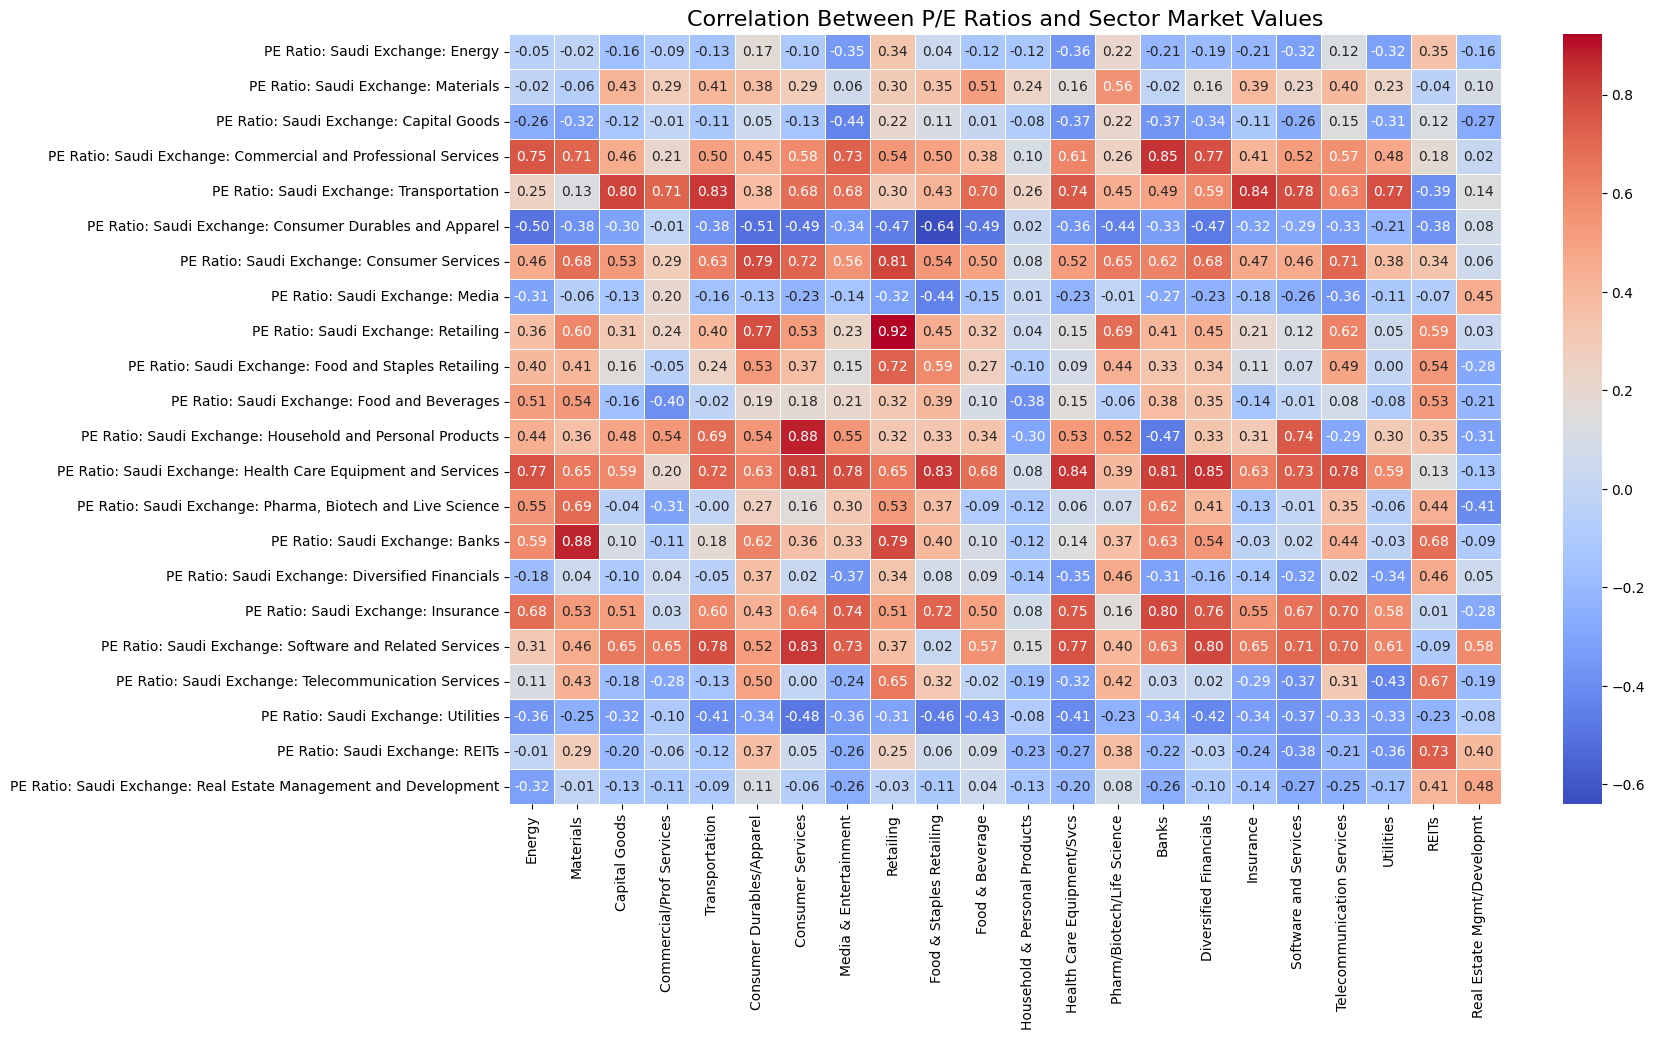

In [26]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pe_to_sector_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between P/E Ratios and Sector Market Values", fontsize=16)
plt.show()


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged dataset
merged_data = pd.read_csv("merged_pe_sector_data.csv")

# Define the column mappings (P/E columns to sector market value columns)
column_mapping = {
    "PE Ratio: Saudi Exchange: Energy": "Energy",
    "PE Ratio: Saudi Exchange: Materials": "Materials",
    "PE Ratio: Saudi Exchange: Capital Goods": "Capital Goods",
    "PE Ratio: Saudi Exchange: Commercial and Professional Services": "Commercial/Prof Services",
    "PE Ratio: Saudi Exchange: Transportation": "Transportation",
    "PE Ratio: Saudi Exchange: Consumer Durables and Apparel": "Consumer Durables/Apparel",
    "PE Ratio: Saudi Exchange: Consumer Services": "Consumer Services",
    "PE Ratio: Saudi Exchange: Media": "Media & Entertainment",
    "PE Ratio: Saudi Exchange: Retailing": "Retailing",
    "PE Ratio: Saudi Exchange: Food and Staples Retailing": "Food & Staples Retailing",
    "PE Ratio: Saudi Exchange: Food and Beverages": "Food & Beverage",
    "PE Ratio: Saudi Exchange: Household and Personal Products": "Household & Personal Products",
    "PE Ratio: Saudi Exchange: Health Care Equipment and Services": "Health Care Equipment/Svcs",
    "PE Ratio: Saudi Exchange: Pharma, Biotech and Live Science": "Pharm/Biotech/Life Science",
    "PE Ratio: Saudi Exchange: Banks": "Banks",
    "PE Ratio: Saudi Exchange: Diversified Financials": "Diversified Financials",
    "PE Ratio: Saudi Exchange: Insurance": "Insurance",
    "PE Ratio: Saudi Exchange: Software and Related Services": "Software and Services",
    "PE Ratio: Saudi Exchange: Telecommunication Services": "Telecommunication Services",
    "PE Ratio: Saudi Exchange: Utilities": "Utilities",
    "PE Ratio: Saudi Exchange: REITs": "REITs",
    "PE Ratio: Saudi Exchange: Real Estate Management and Development": "Real Estate Mgmt/Developmt"
}


In [28]:
# Dictionary to store correlations
correlation_results = {}

for pe_column, sector_column in column_mapping.items():
    # Drop rows with NaN values for accurate correlation
    subset = merged_data[[pe_column, sector_column]].dropna()

    # Calculate correlation
    correlation = subset[pe_column].corr(subset[sector_column])

    # Store the result
    correlation_results[sector_column] = correlation

# Display correlation results
print("Sector-wise Correlations:")
for sector, corr in correlation_results.items():
    print(f"{sector}: {corr:.2f}")


Sector-wise Correlations:
Energy: -0.05
Materials: -0.06
Capital Goods: -0.12
Commercial/Prof Services: 0.21
Transportation: 0.83
Consumer Durables/Apparel: -0.51
Consumer Services: 0.72
Media & Entertainment: -0.14
Retailing: 0.92
Food & Staples Retailing: 0.59
Food & Beverage: 0.10
Household & Personal Products: -0.30
Health Care Equipment/Svcs: 0.84
Pharm/Biotech/Life Science: 0.07
Banks: 0.63
Diversified Financials: -0.16
Insurance: 0.55
Software and Services: 0.71
Telecommunication Services: 0.31
Utilities: -0.33
REITs: 0.73
Real Estate Mgmt/Developmt: 0.48


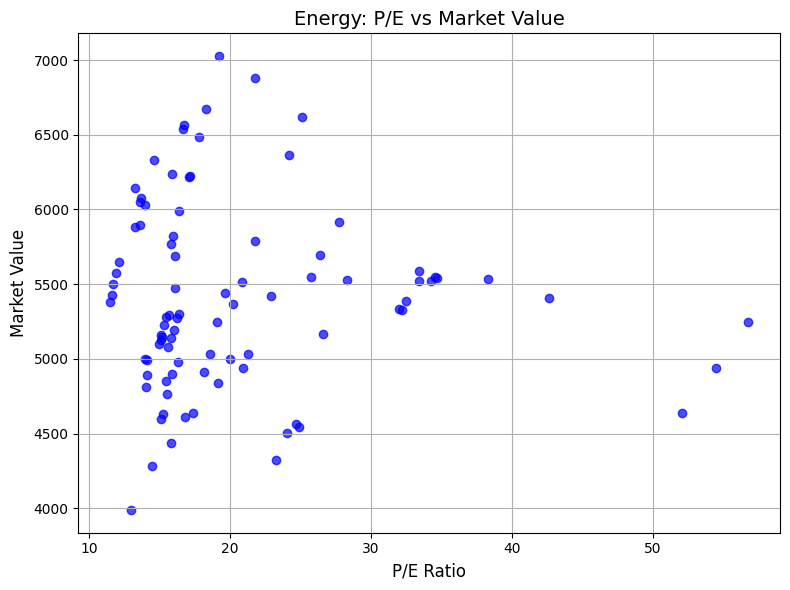

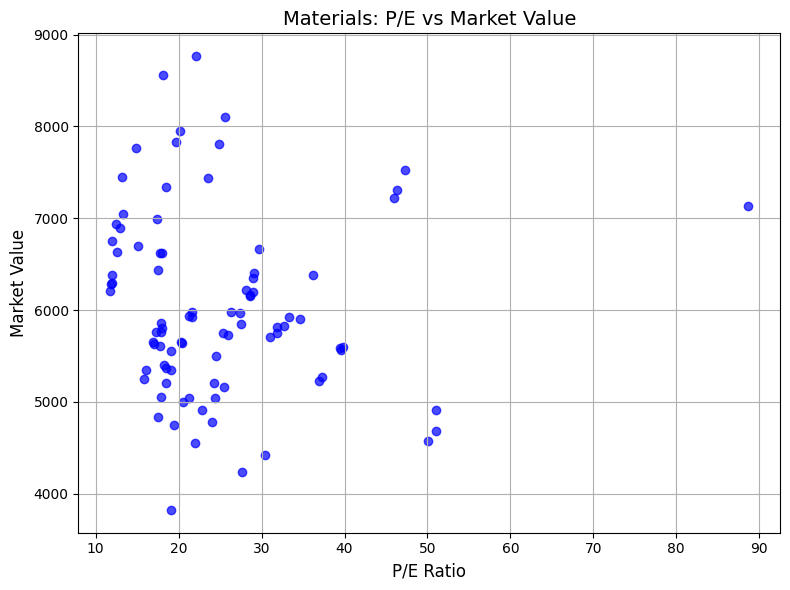

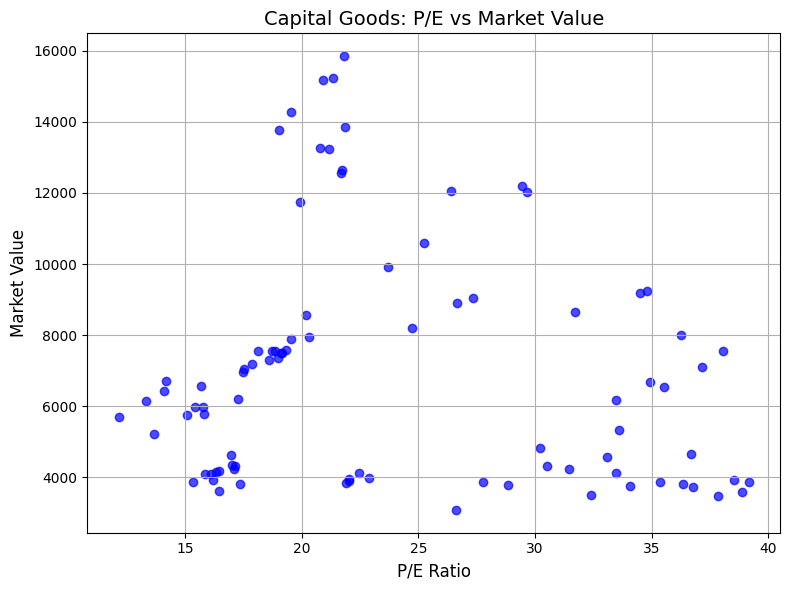

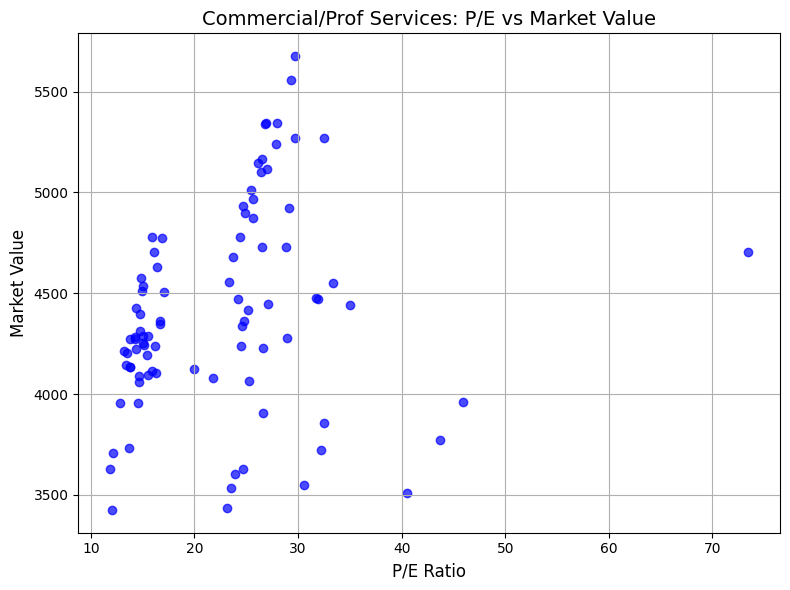

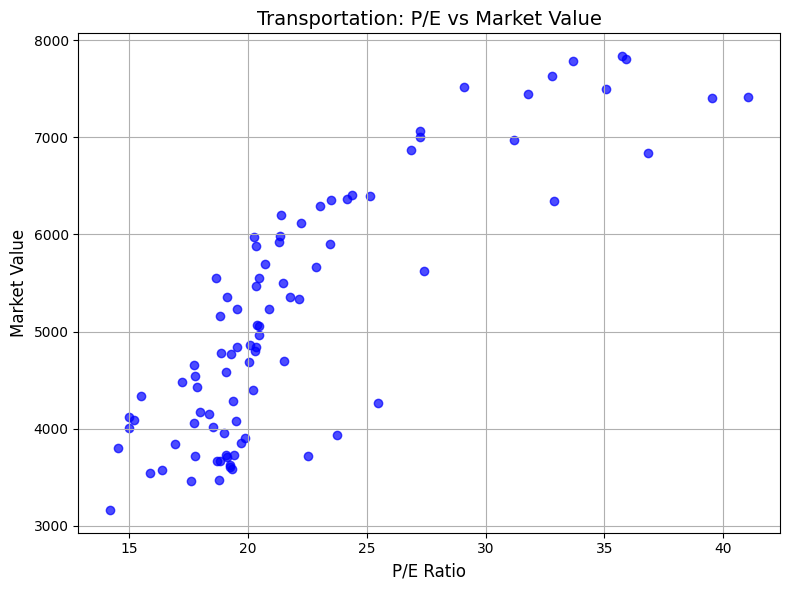

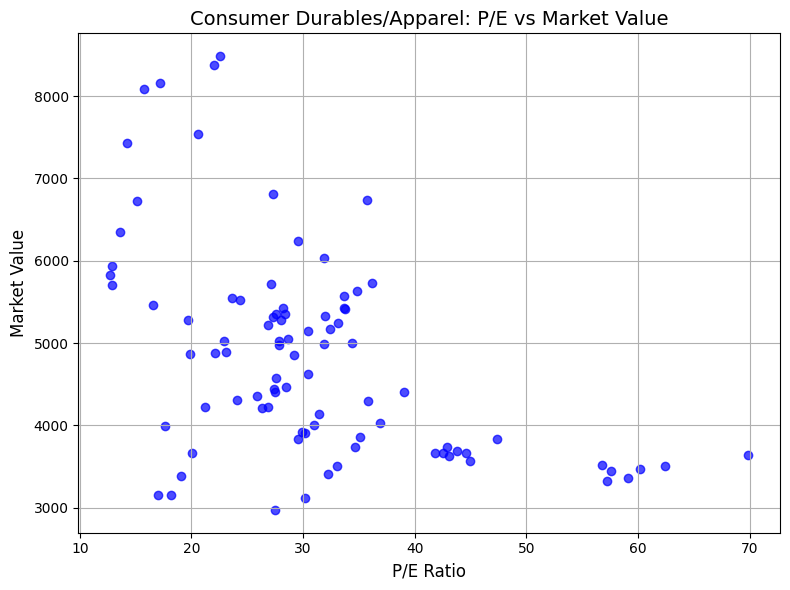

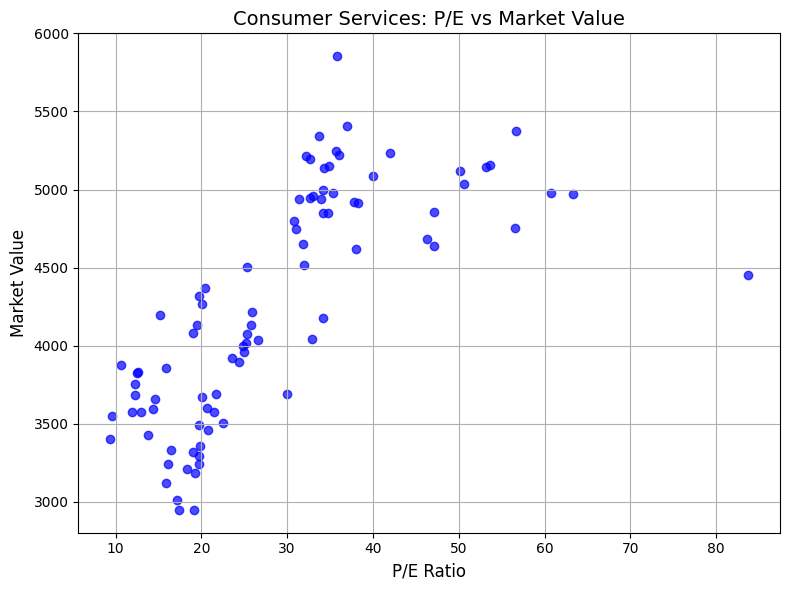

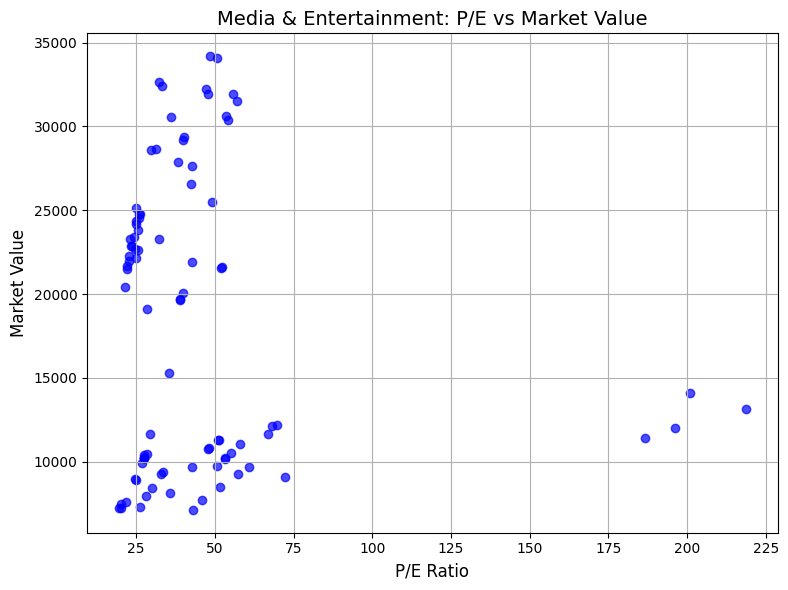

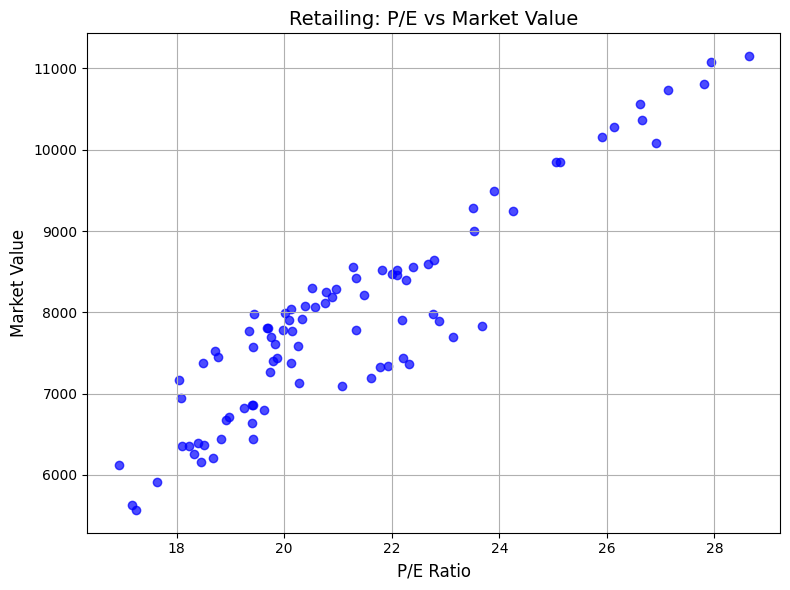

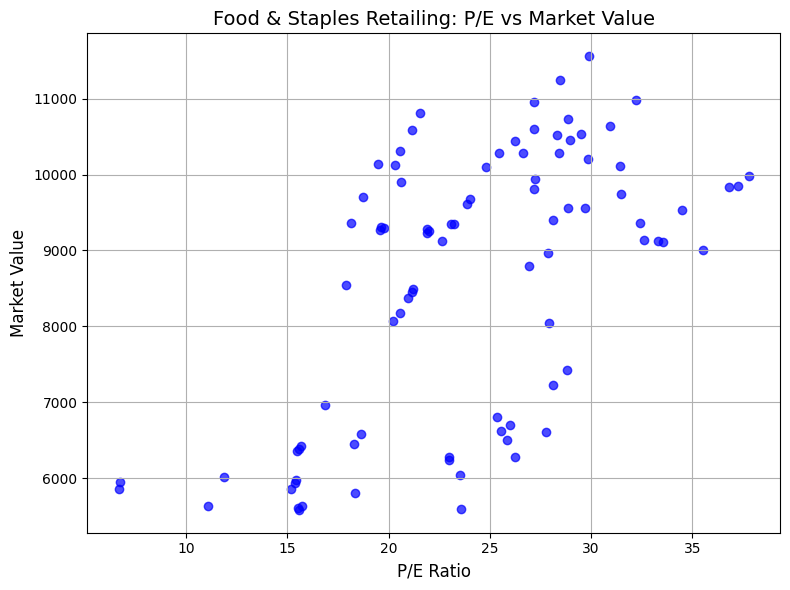

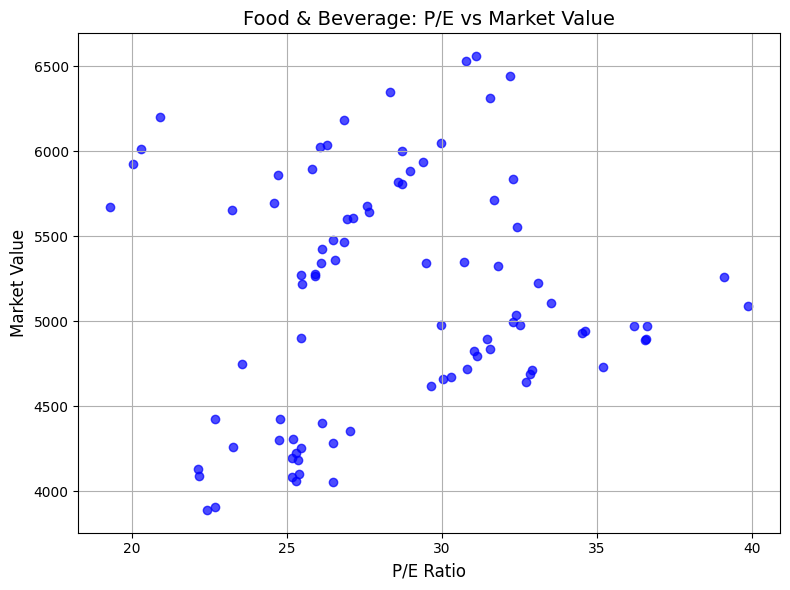

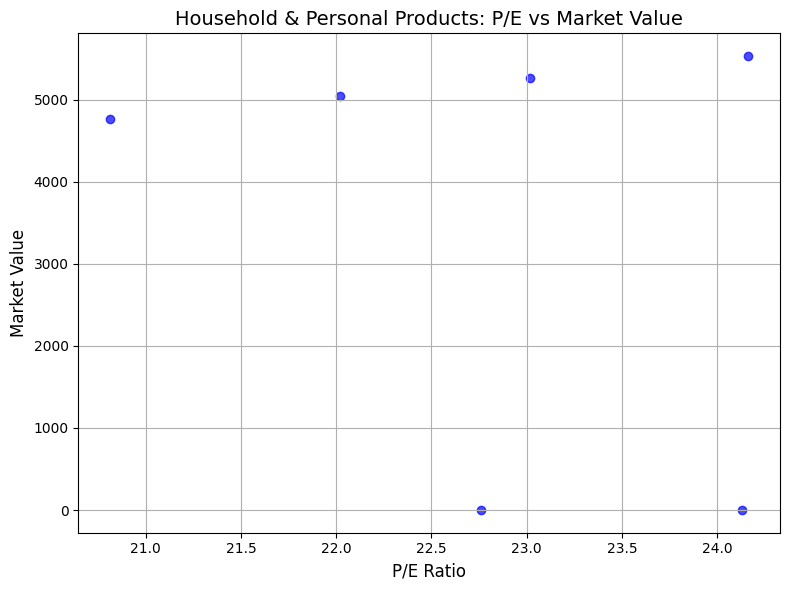

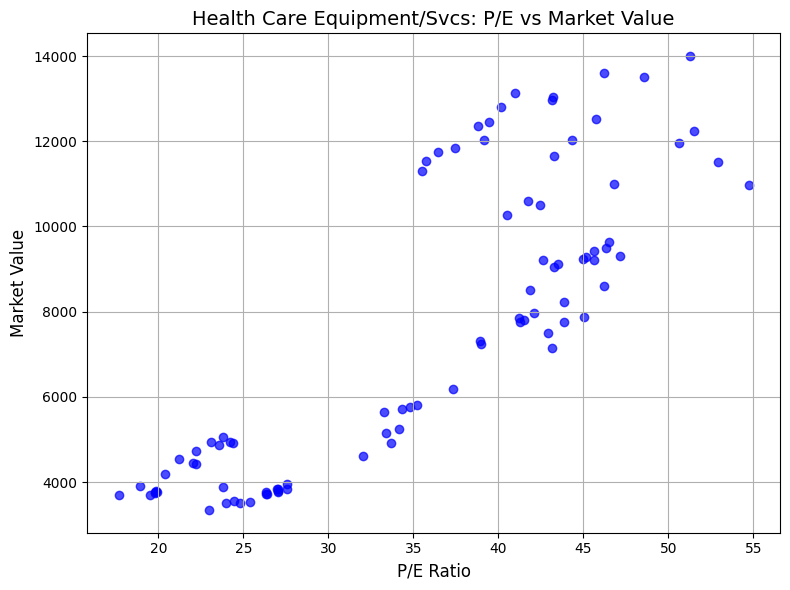

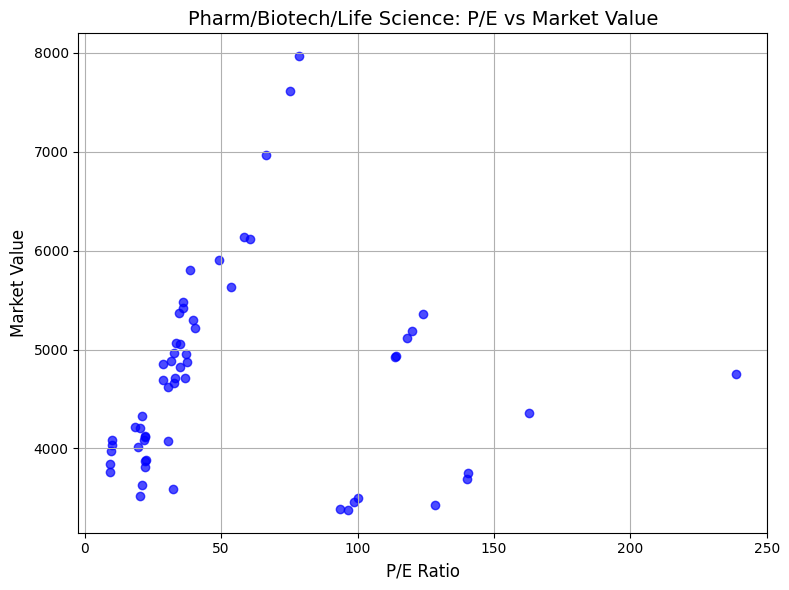

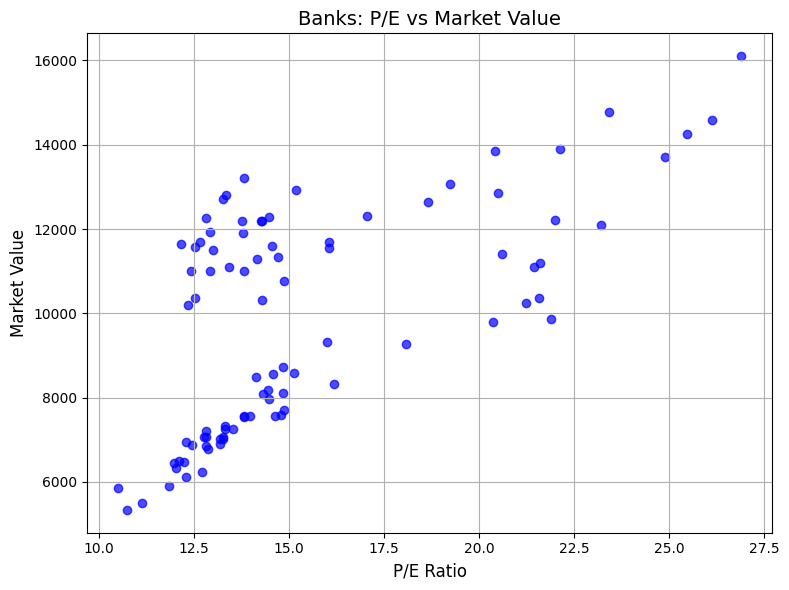

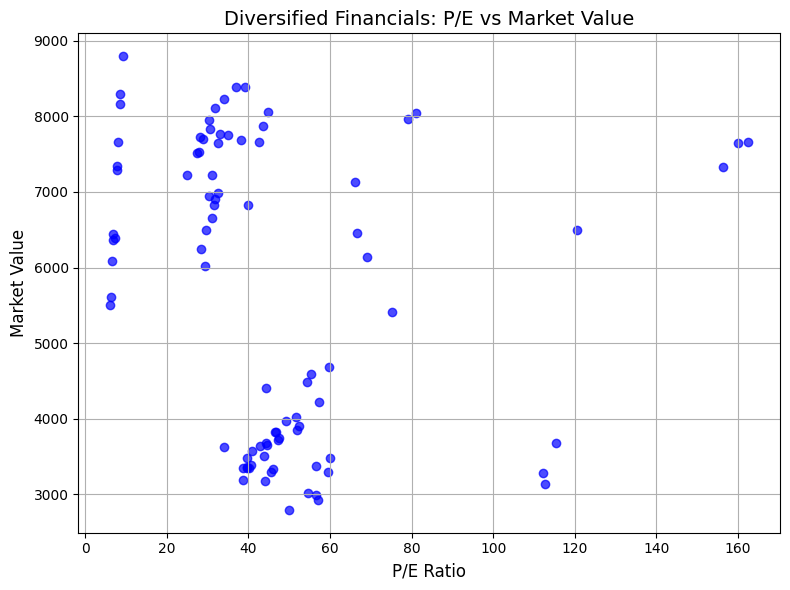

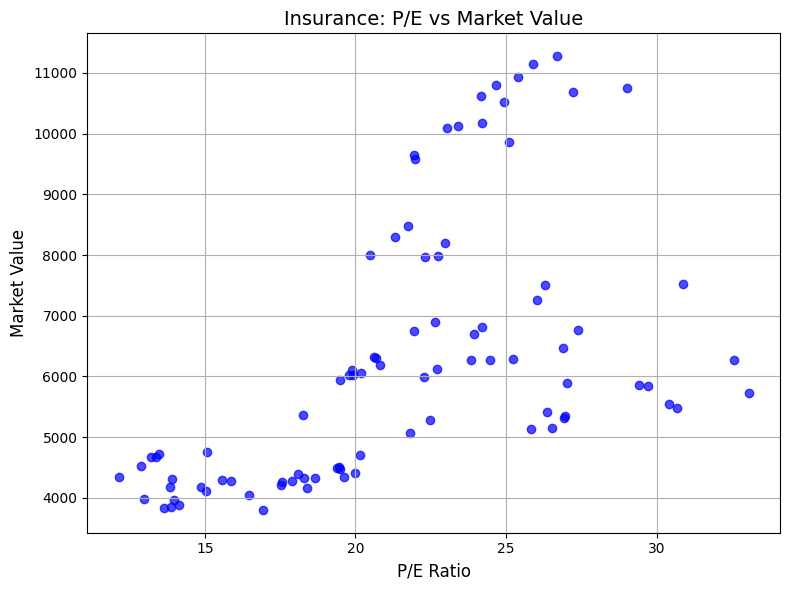

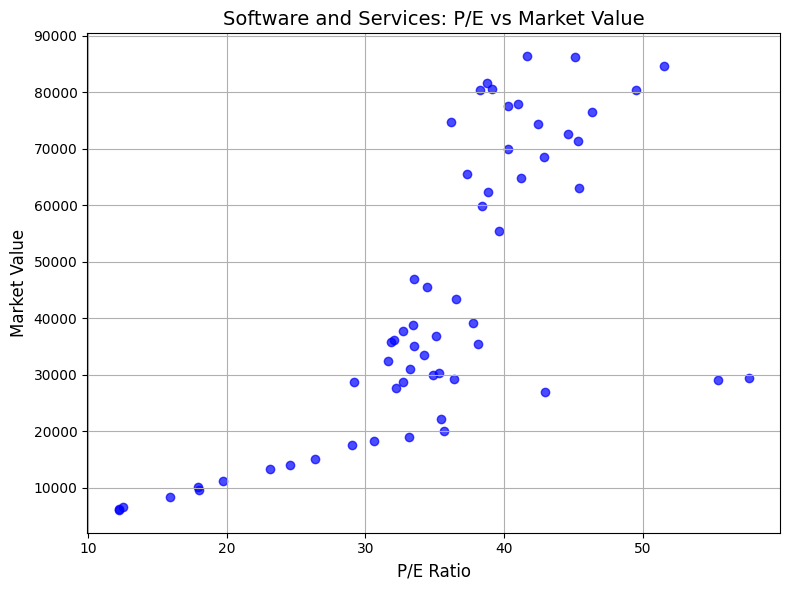

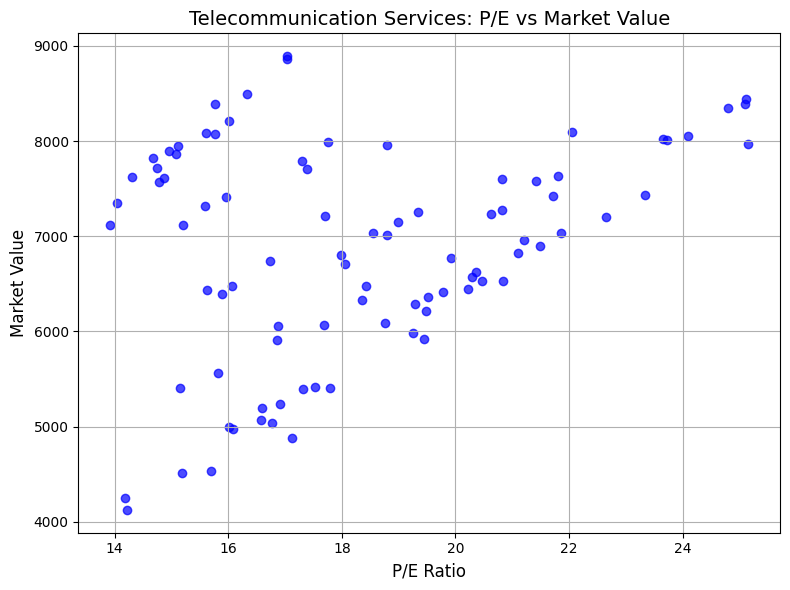

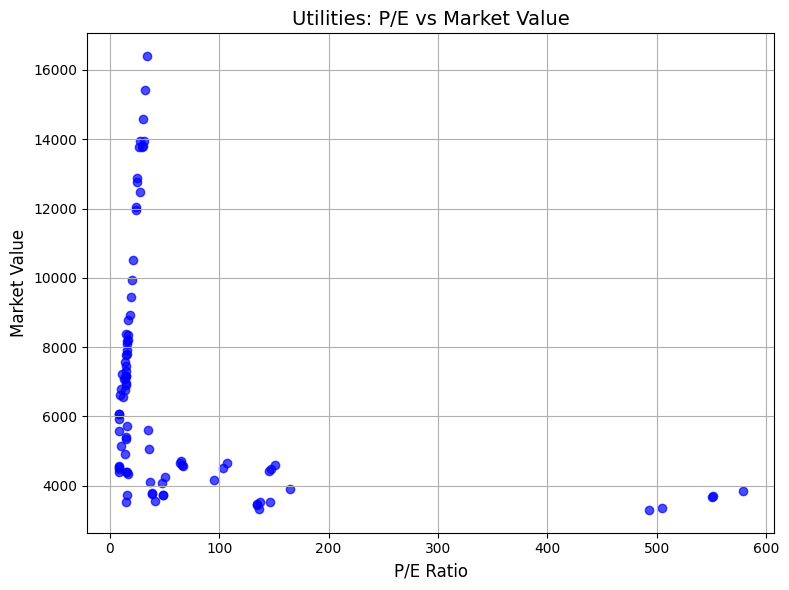

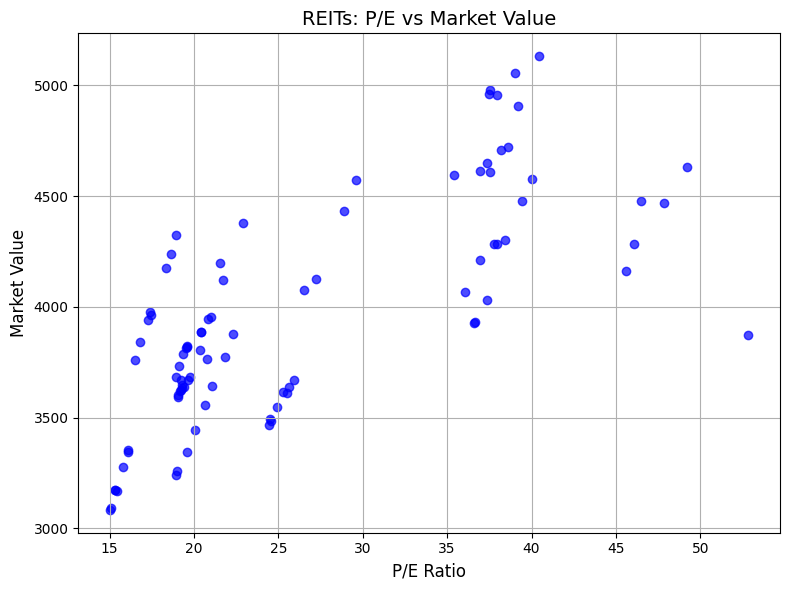

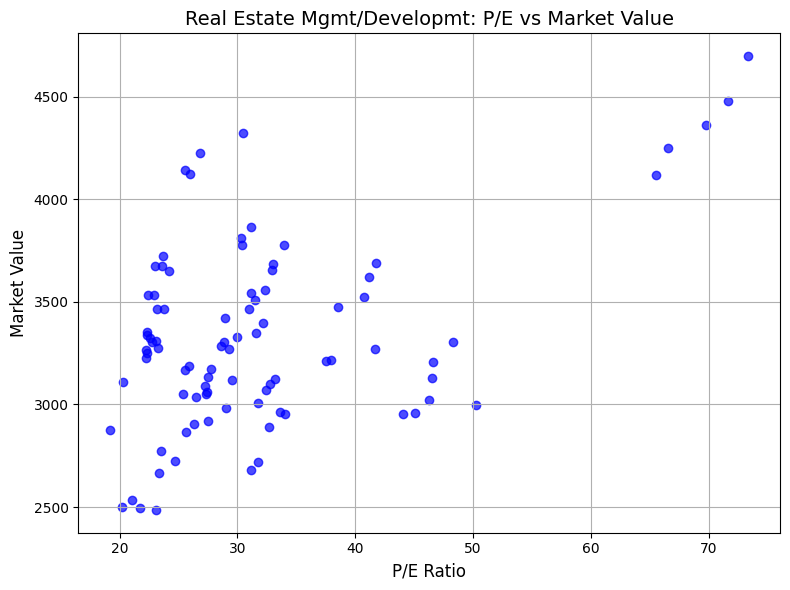

In [29]:
for pe_column, sector_column in column_mapping.items():
    # Drop rows with NaN values for accurate visualization
    subset = merged_data[[pe_column, sector_column]].dropna()

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(subset[pe_column], subset[sector_column], alpha=0.7, color='blue')
    plt.title(f"{sector_column}: P/E vs Market Value", fontsize=14)
    plt.xlabel("P/E Ratio", fontsize=12)
    plt.ylabel("Market Value", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged dataset
merged_data = pd.read_csv("merged_pe_sector_data.csv")

# Ensure the 'Date' column is in datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Define the column mappings (P/E columns to sector market value columns)
column_mapping = {
    "PE Ratio: Saudi Exchange: Energy": "Energy",
    "PE Ratio: Saudi Exchange: Materials": "Materials",
    "PE Ratio: Saudi Exchange: Capital Goods": "Capital Goods",
    "PE Ratio: Saudi Exchange: Commercial and Professional Services": "Commercial/Prof Services",
    "PE Ratio: Saudi Exchange: Transportation": "Transportation",
    "PE Ratio: Saudi Exchange: Consumer Durables and Apparel": "Consumer Durables/Apparel",
    "PE Ratio: Saudi Exchange: Consumer Services": "Consumer Services",
    "PE Ratio: Saudi Exchange: Media": "Media & Entertainment",
    "PE Ratio: Saudi Exchange: Retailing": "Retailing",
    "PE Ratio: Saudi Exchange: Food and Staples Retailing": "Food & Staples Retailing",
    "PE Ratio: Saudi Exchange: Food and Beverages": "Food & Beverage",
    "PE Ratio: Saudi Exchange: Household and Personal Products": "Household & Personal Products",
    "PE Ratio: Saudi Exchange: Health Care Equipment and Services": "Health Care Equipment/Svcs",
    "PE Ratio: Saudi Exchange: Pharma, Biotech and Live Science": "Pharm/Biotech/Life Science",
    "PE Ratio: Saudi Exchange: Banks": "Banks",
    "PE Ratio: Saudi Exchange: Diversified Financials": "Diversified Financials",
    "PE Ratio: Saudi Exchange: Insurance": "Insurance",
    "PE Ratio: Saudi Exchange: Software and Related Services": "Software and Services",
    "PE Ratio: Saudi Exchange: Telecommunication Services": "Telecommunication Services",
    "PE Ratio: Saudi Exchange: Utilities": "Utilities",
    "PE Ratio: Saudi Exchange: REITs": "REITs",
    "PE Ratio: Saudi Exchange: Real Estate Management and Development": "Real Estate Mgmt/Developmt"
}


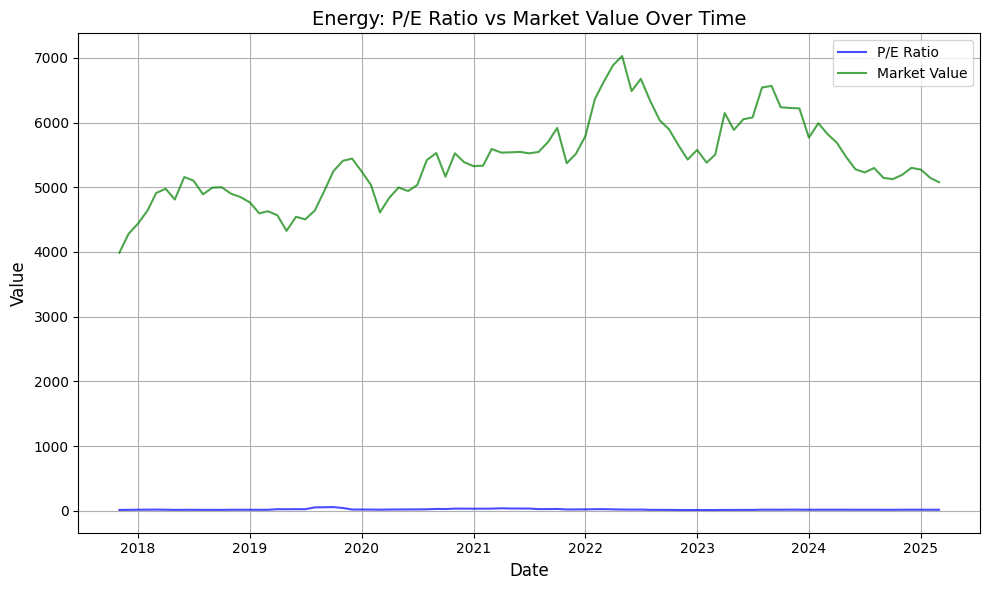

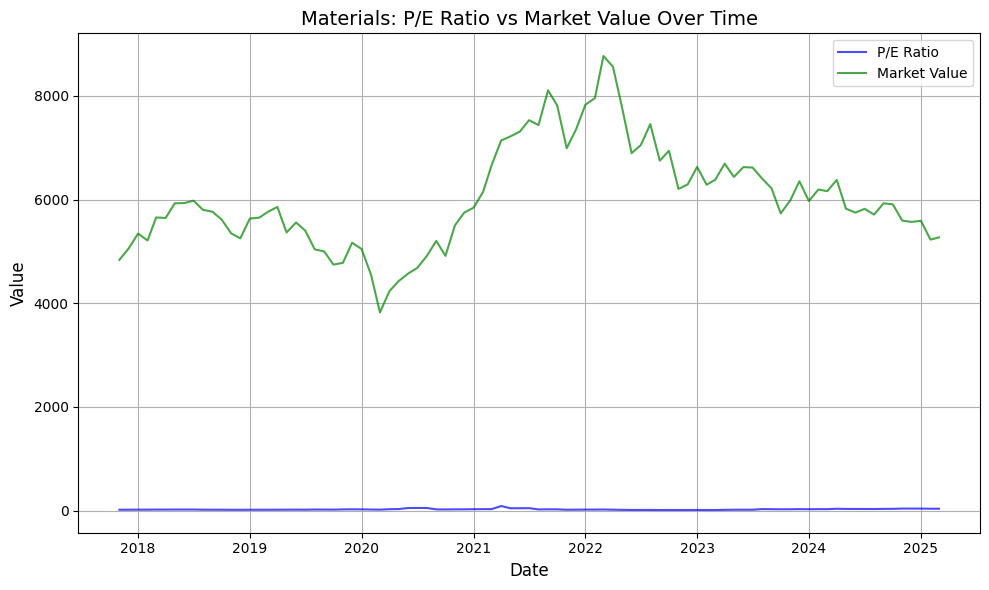

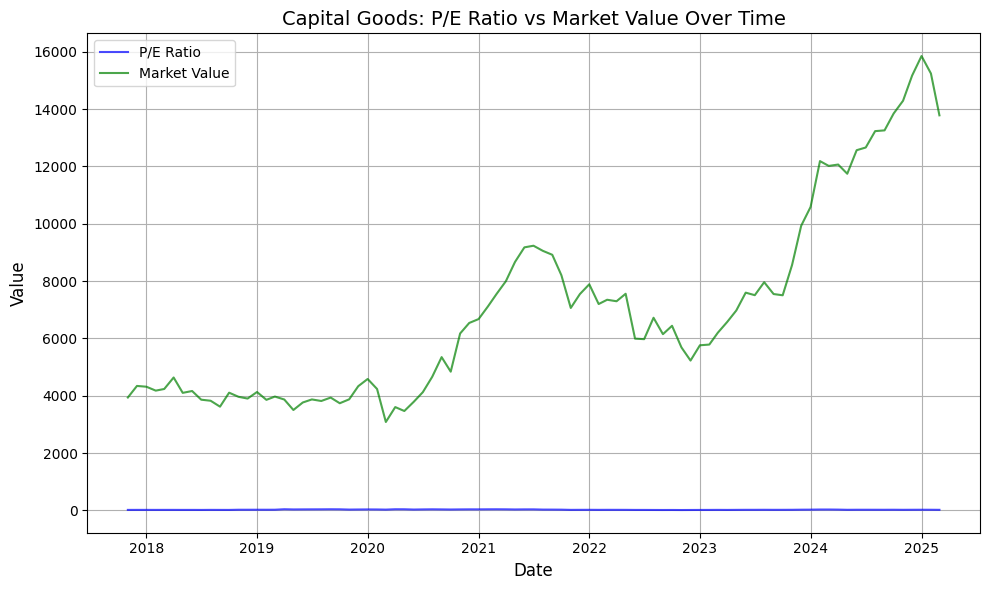

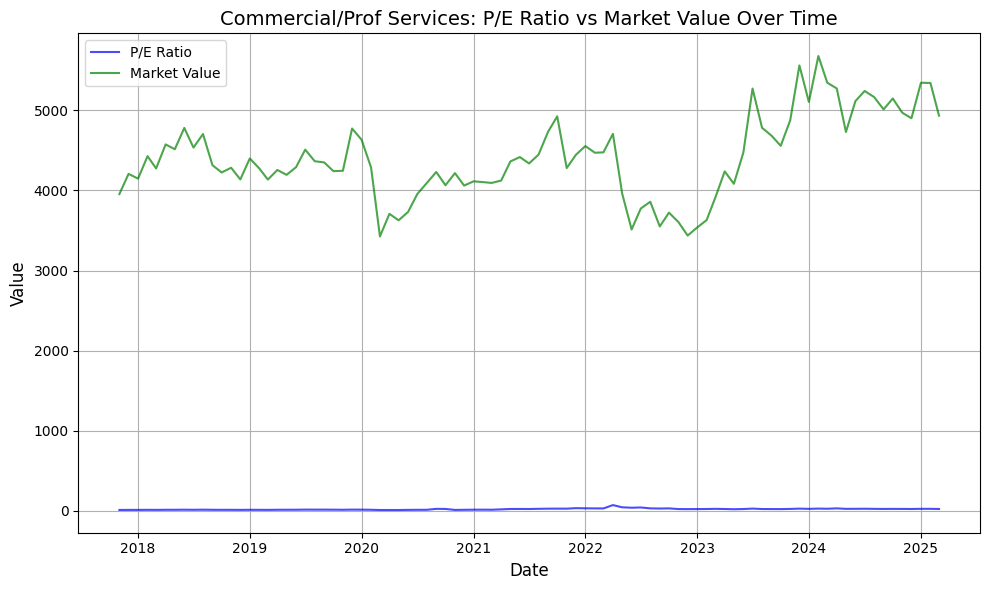

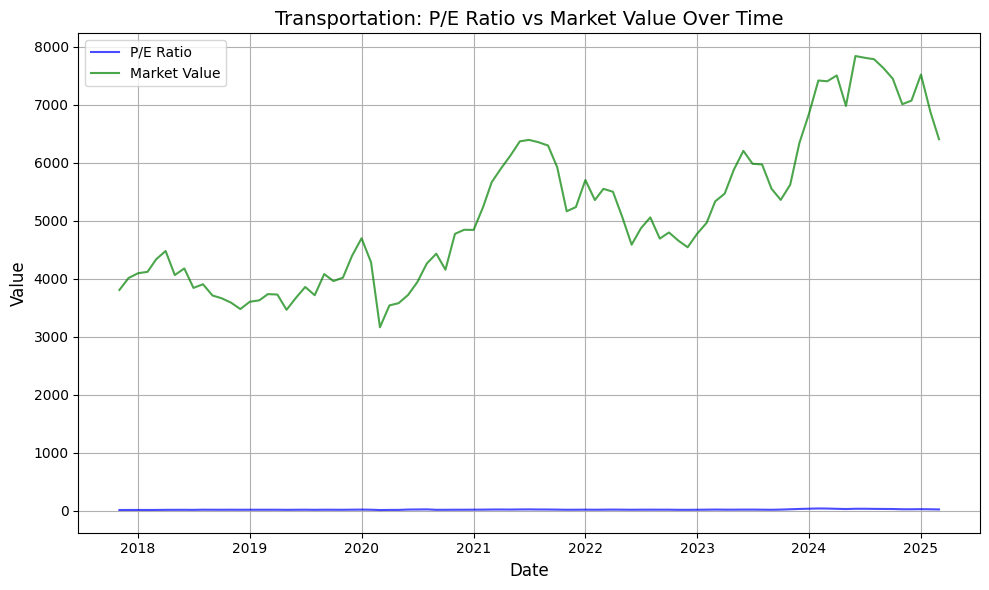

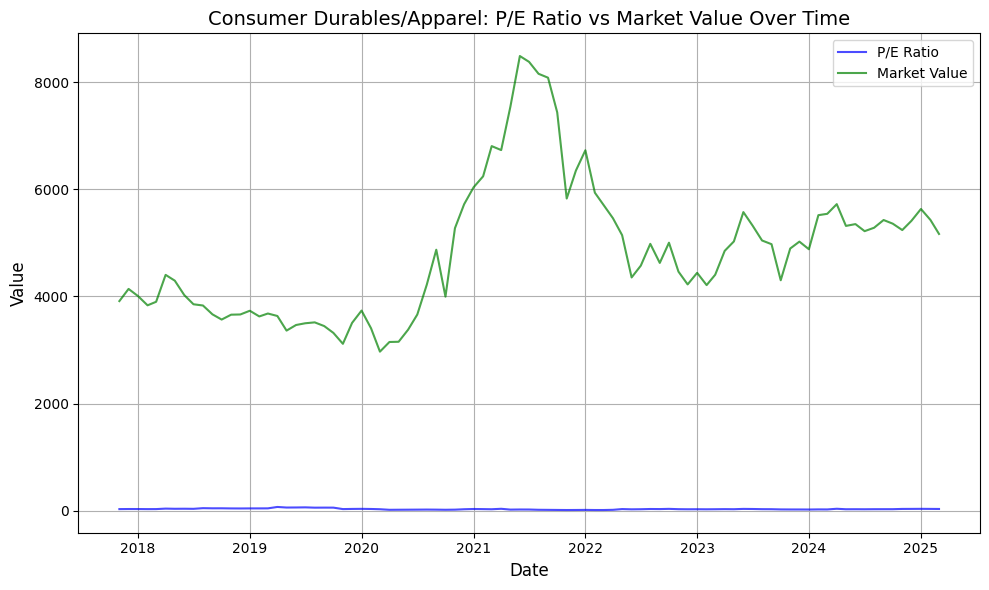

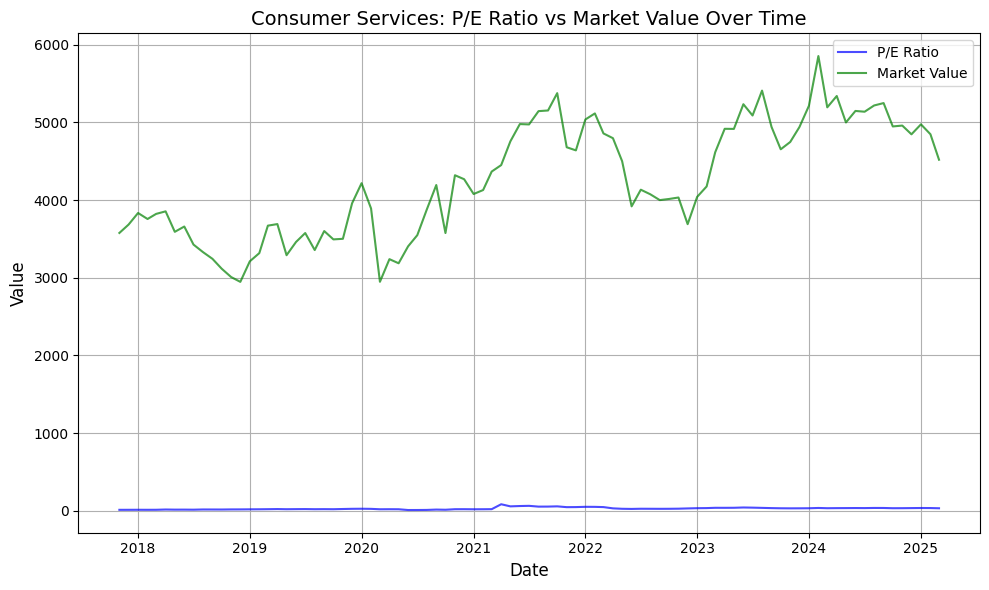

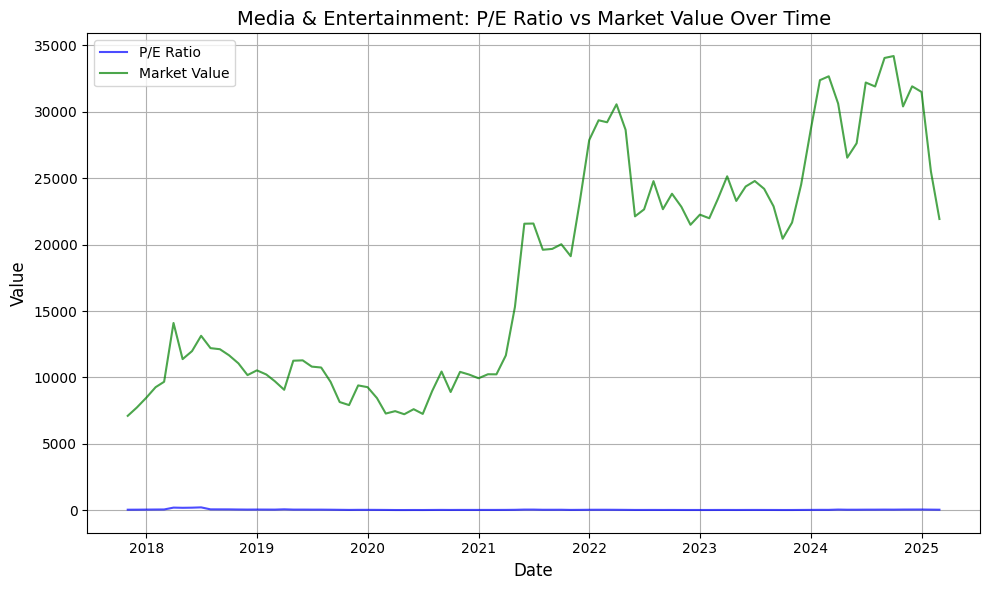

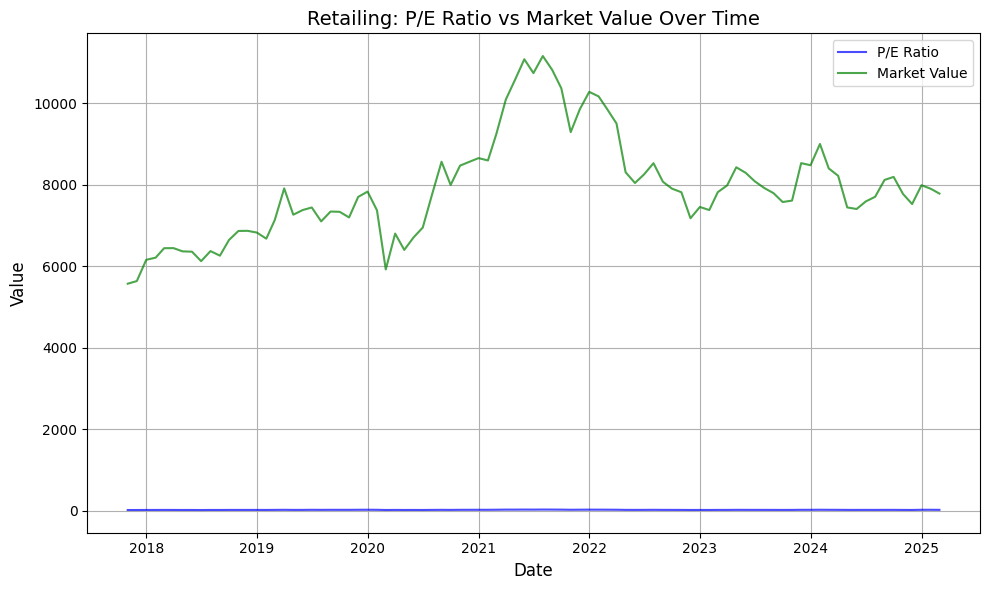

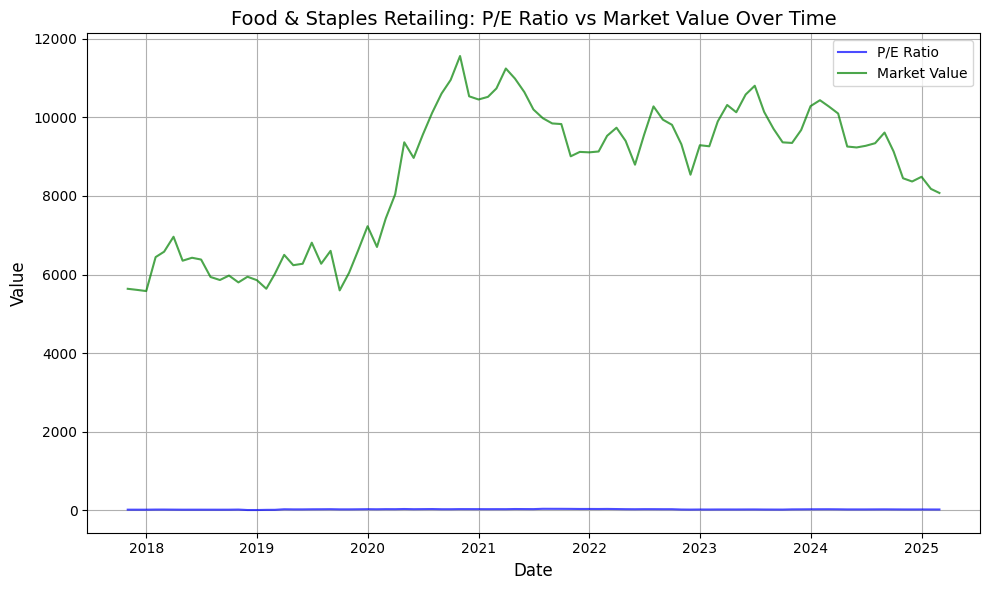

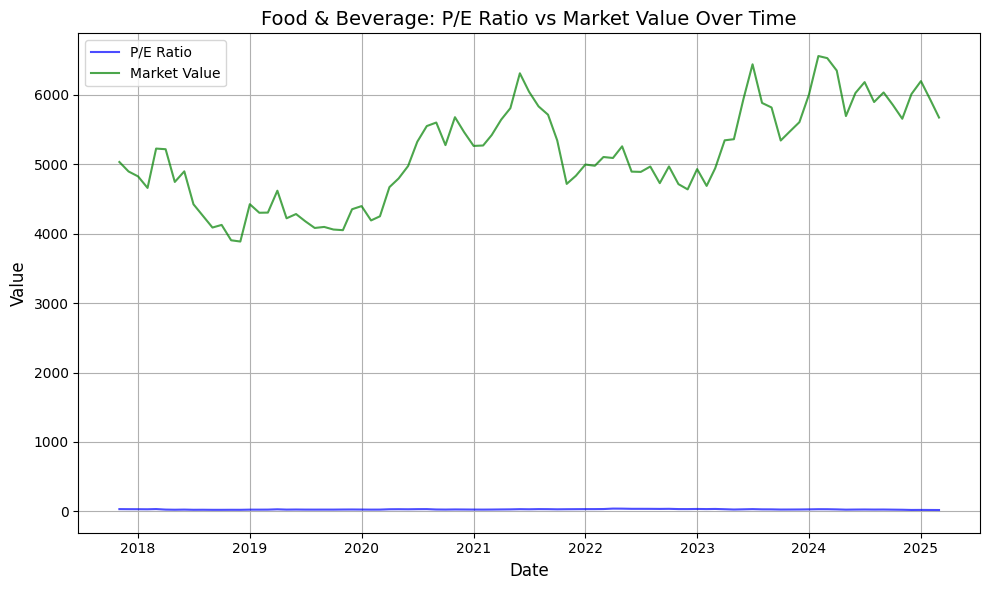

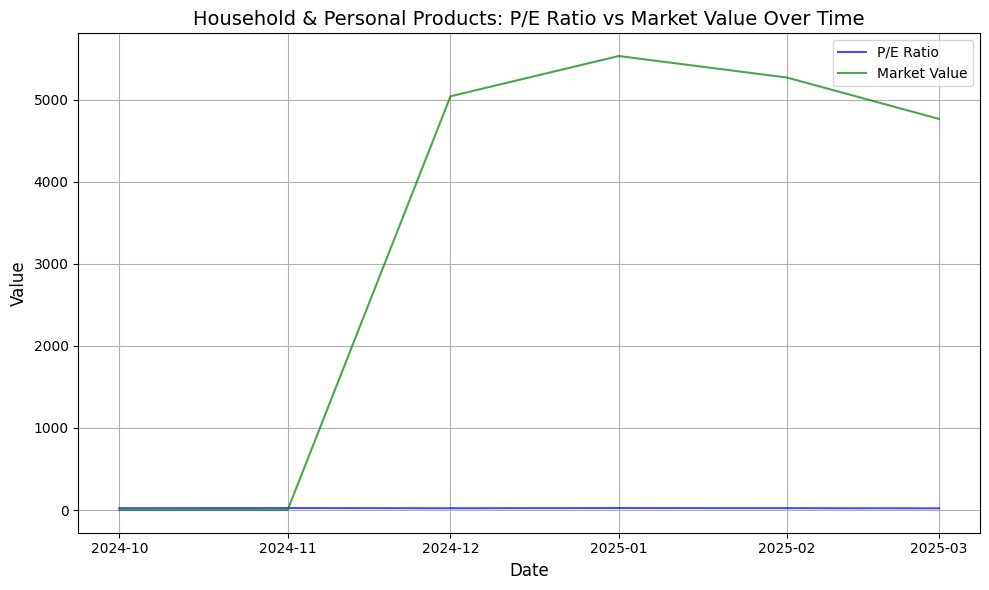

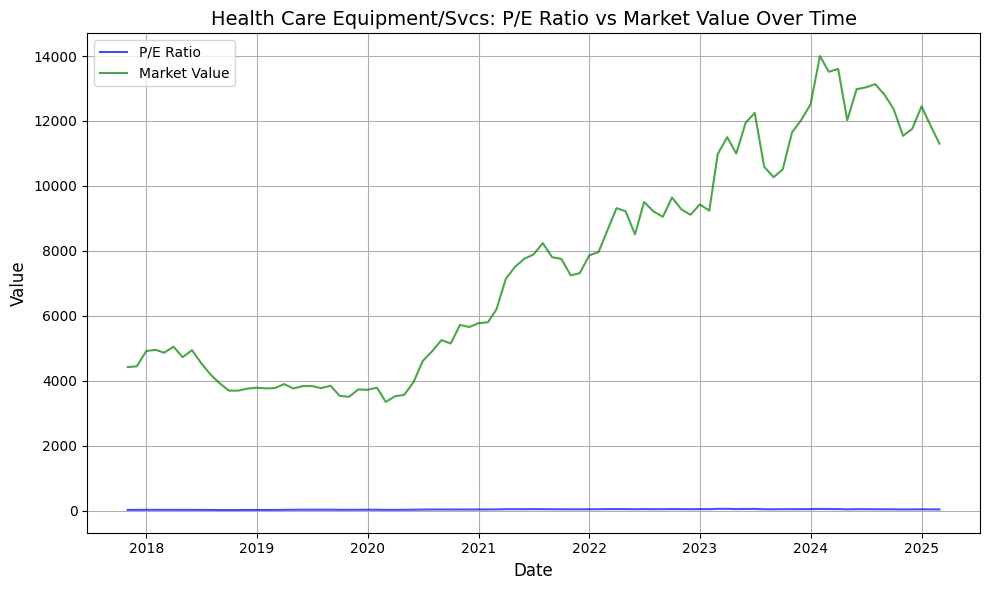

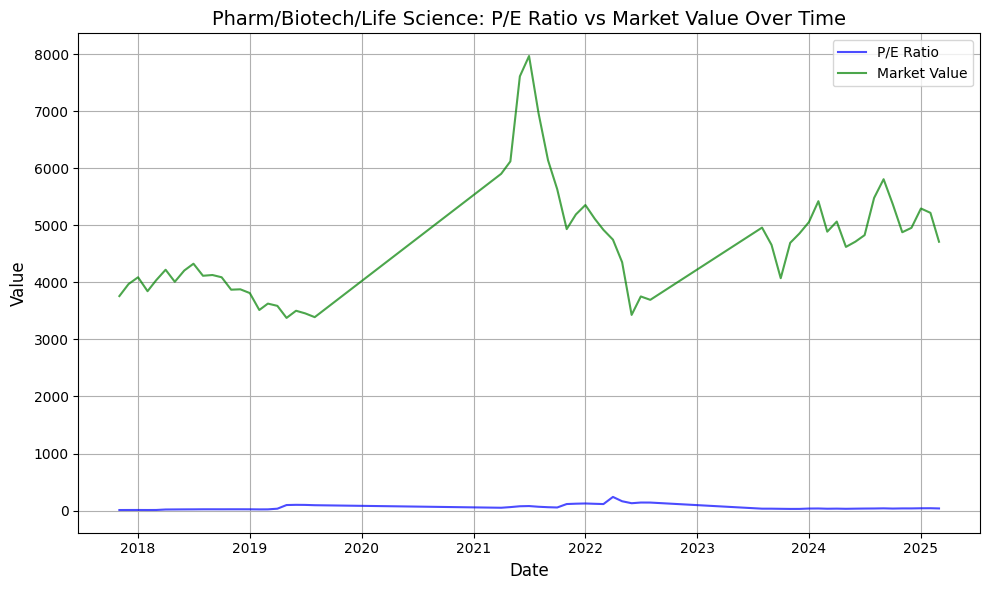

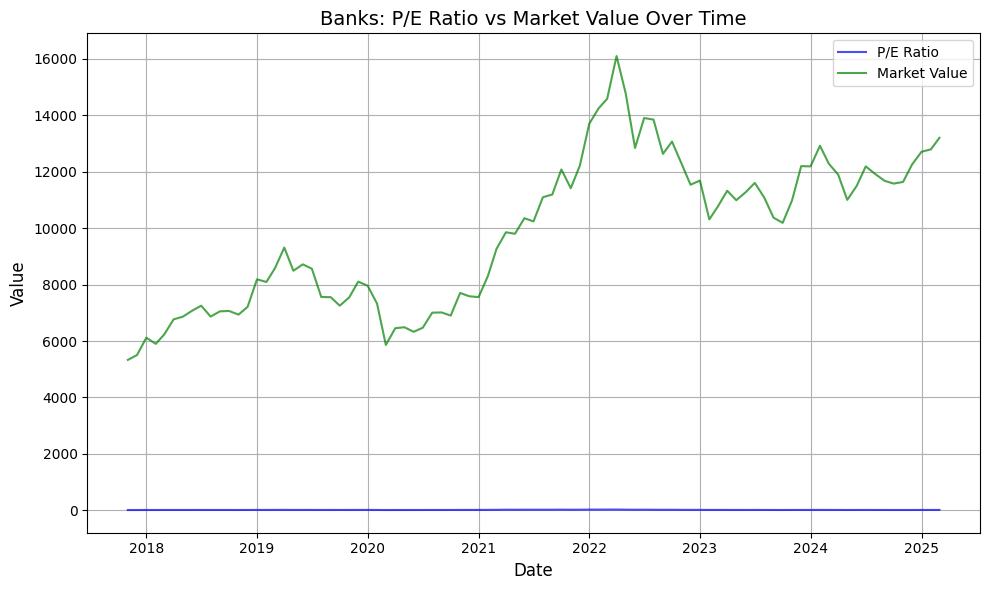

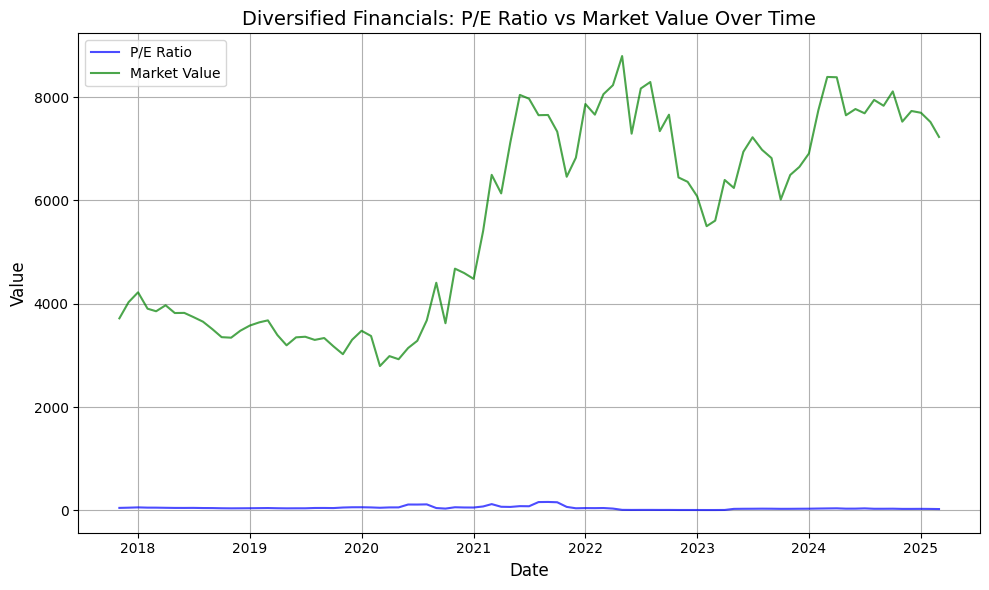

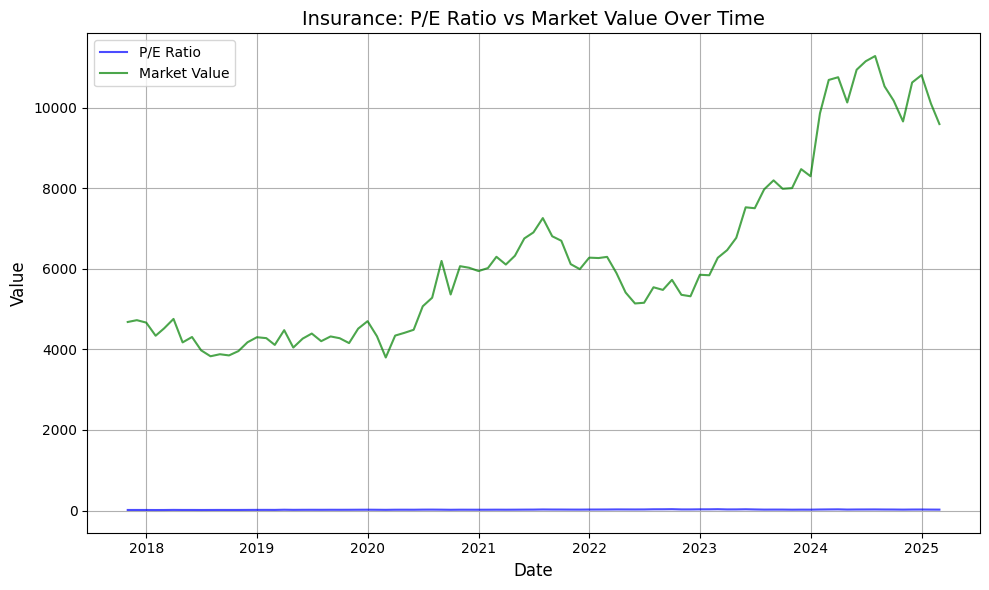

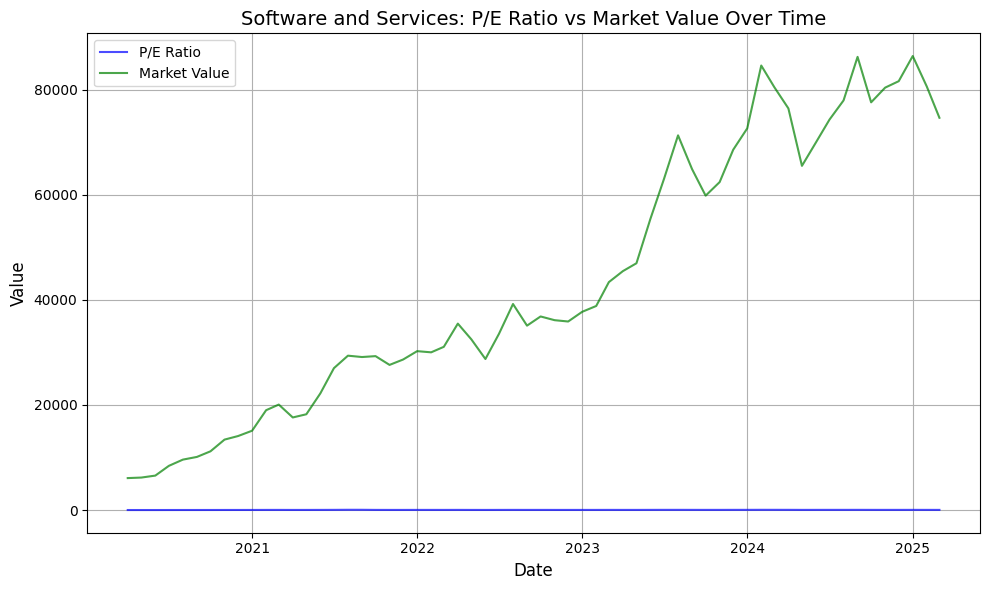

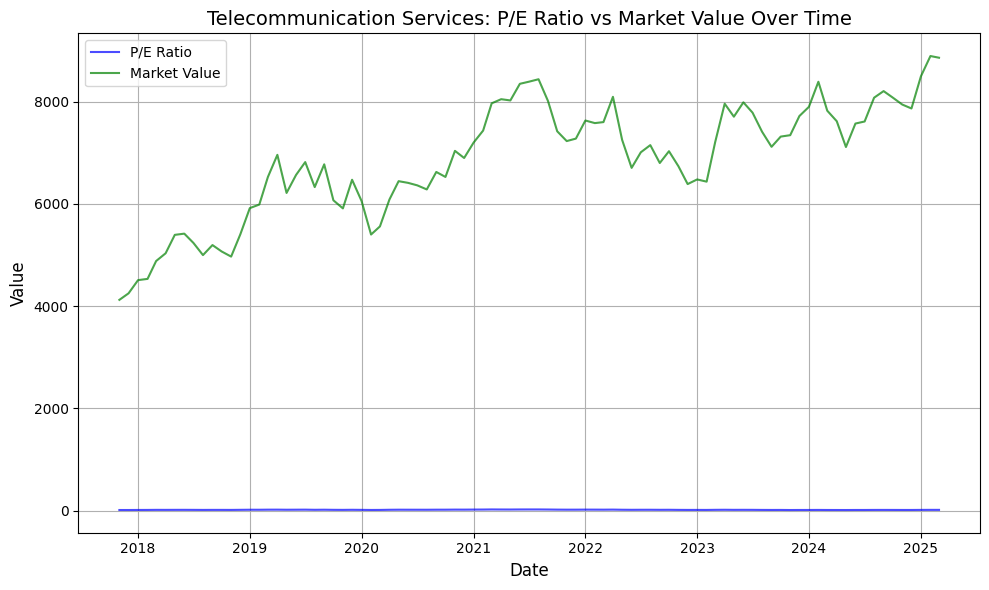

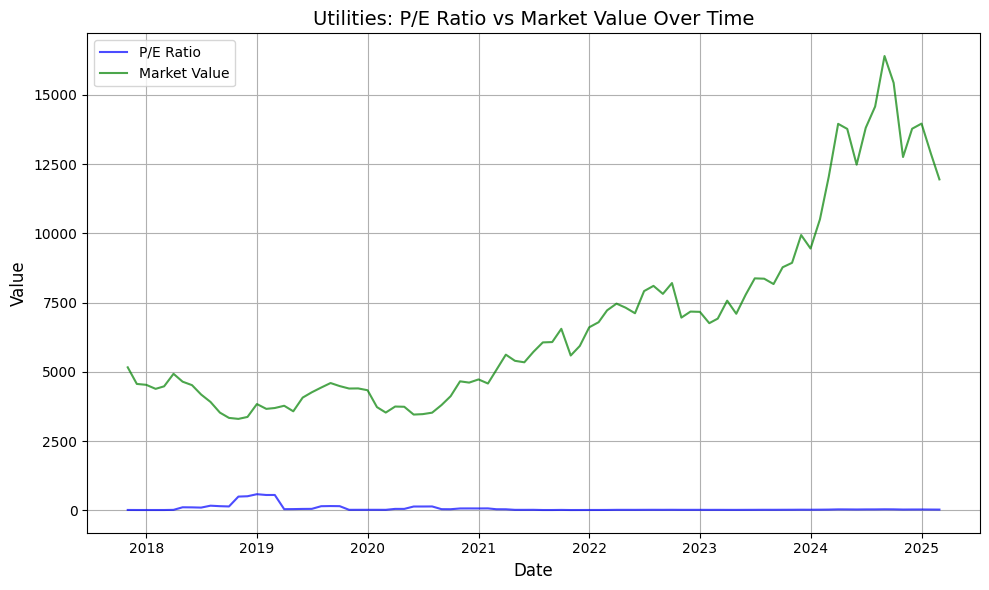

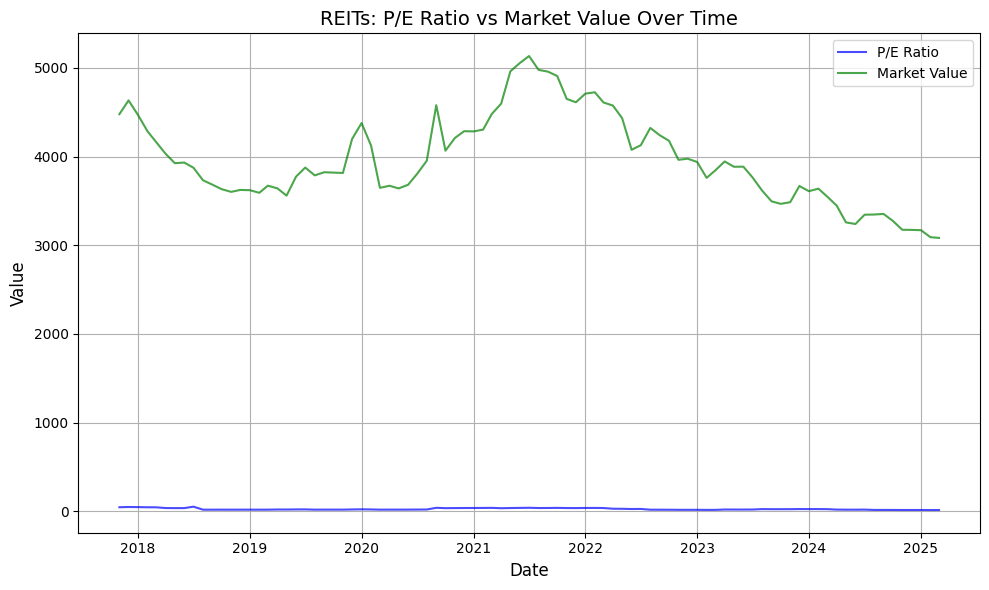

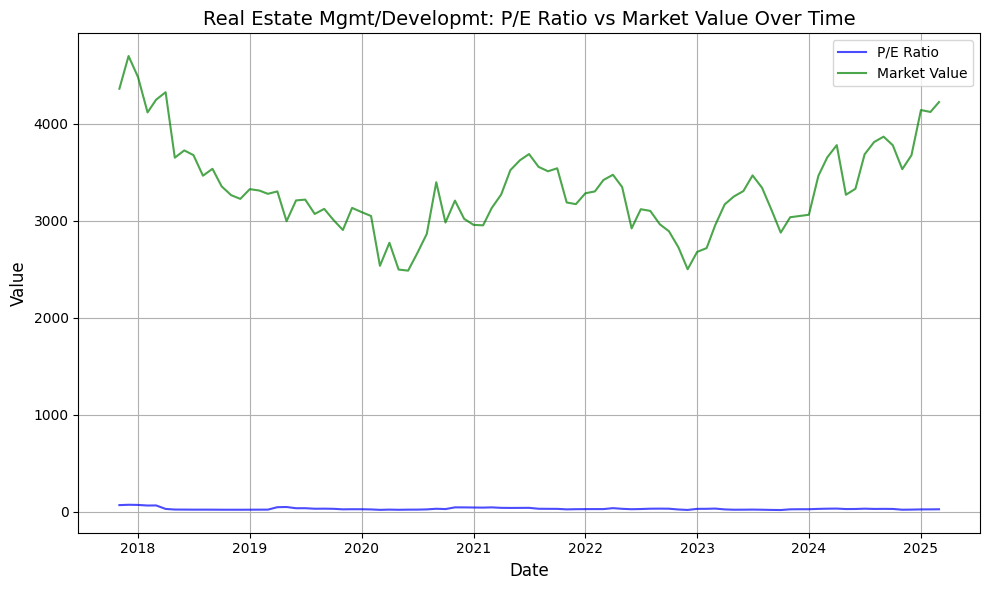

In [31]:
for pe_column, sector_column in column_mapping.items():
    # Drop rows with NaN values for accurate visualization
    subset = merged_data[['Date', pe_column, sector_column]].dropna()

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(subset['Date'], subset[pe_column], label="P/E Ratio", color="blue", alpha=0.7)
    plt.plot(subset['Date'], subset[sector_column], label="Market Value", color="green", alpha=0.7)

    # Add labels and legend
    plt.title(f"{sector_column}: P/E Ratio vs Market Value Over Time", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [32]:
import os

for pe_column, sector_column in column_mapping.items():
    # Drop rows with NaN values
    subset = merged_data[['Date', pe_column, sector_column]].dropna()

    # Optionally, calculate a rolling correlation (e.g., 6 months)
    subset['Rolling Correlation'] = subset[pe_column].rolling(6).corr(subset[sector_column])

    # Save the results to a CSV file
    output_dir = 'output_data'  # Define the output directory

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Replace '/' in sector_column with another character if it is there to prevent the implicit nested directory structure
    output_file = os.path.join(output_dir, f"{sector_column.replace('/', '_')}_pe_vs_market_value.csv")

    subset.to_csv(output_file, index=False)
    print(f"Saved results for {sector_column} to {output_file}")

Saved results for Energy to output_data/Energy_pe_vs_market_value.csv
Saved results for Materials to output_data/Materials_pe_vs_market_value.csv
Saved results for Capital Goods to output_data/Capital Goods_pe_vs_market_value.csv
Saved results for Commercial/Prof Services to output_data/Commercial_Prof Services_pe_vs_market_value.csv
Saved results for Transportation to output_data/Transportation_pe_vs_market_value.csv
Saved results for Consumer Durables/Apparel to output_data/Consumer Durables_Apparel_pe_vs_market_value.csv
Saved results for Consumer Services to output_data/Consumer Services_pe_vs_market_value.csv
Saved results for Media & Entertainment to output_data/Media & Entertainment_pe_vs_market_value.csv
Saved results for Retailing to output_data/Retailing_pe_vs_market_value.csv
Saved results for Food & Staples Retailing to output_data/Food & Staples Retailing_pe_vs_market_value.csv
Saved results for Food & Beverage to output_data/Food & Beverage_pe_vs_market_value.csv
Saved re

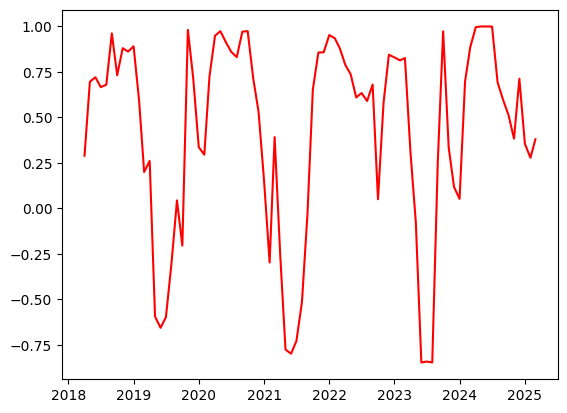

In [33]:
subset['Rolling Correlation'] = subset[pe_column].rolling(6).corr(subset[sector_column])
plt.plot(subset['Date'], subset['Rolling Correlation'], label="Rolling Correlation (6 months)", color="red")


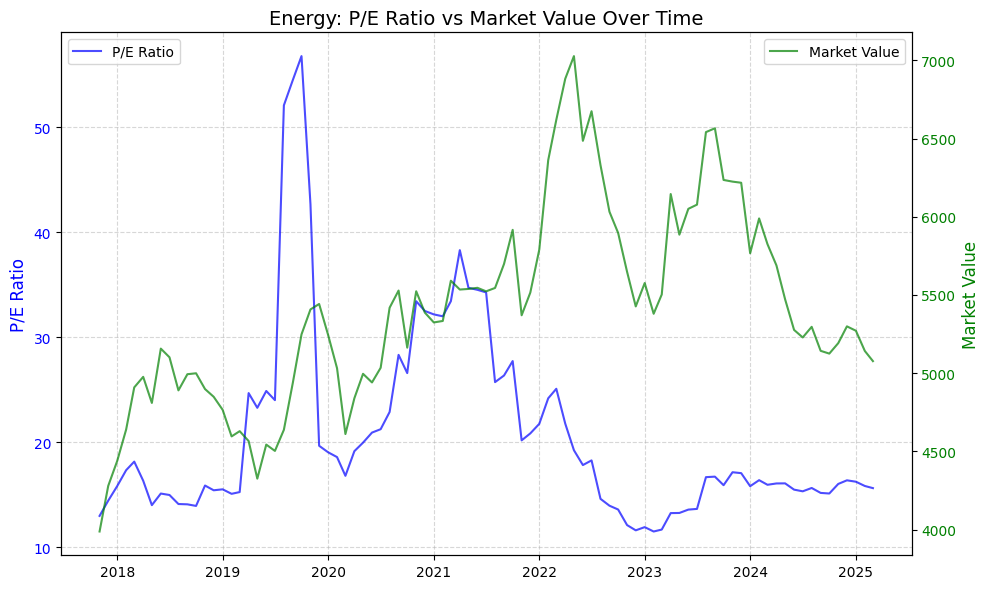

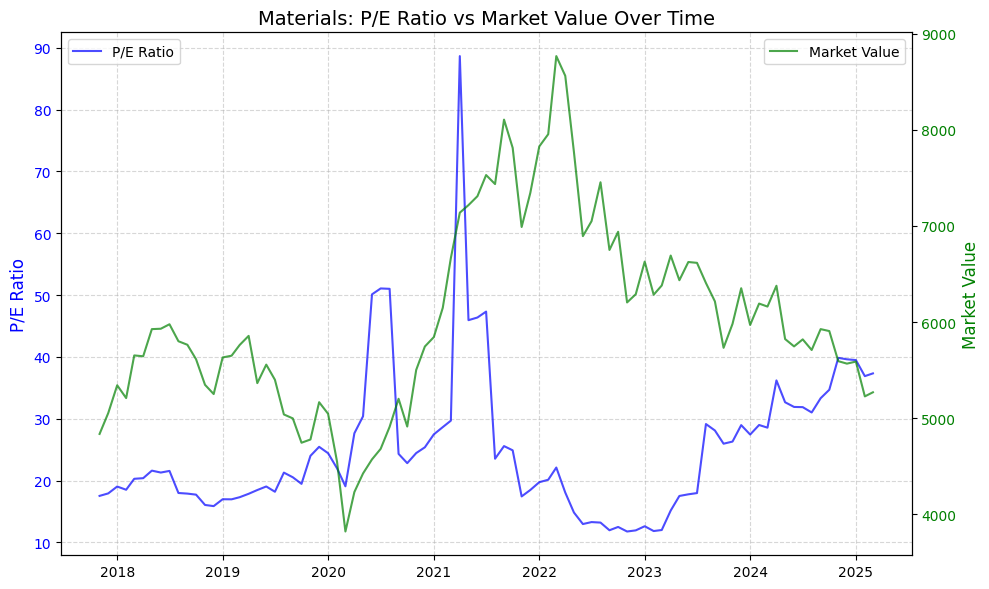

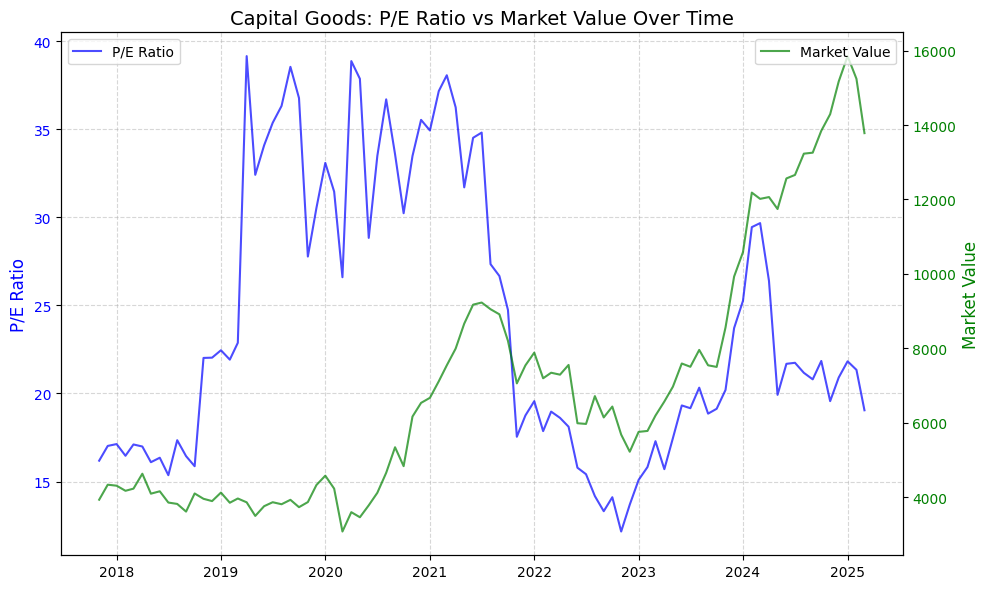

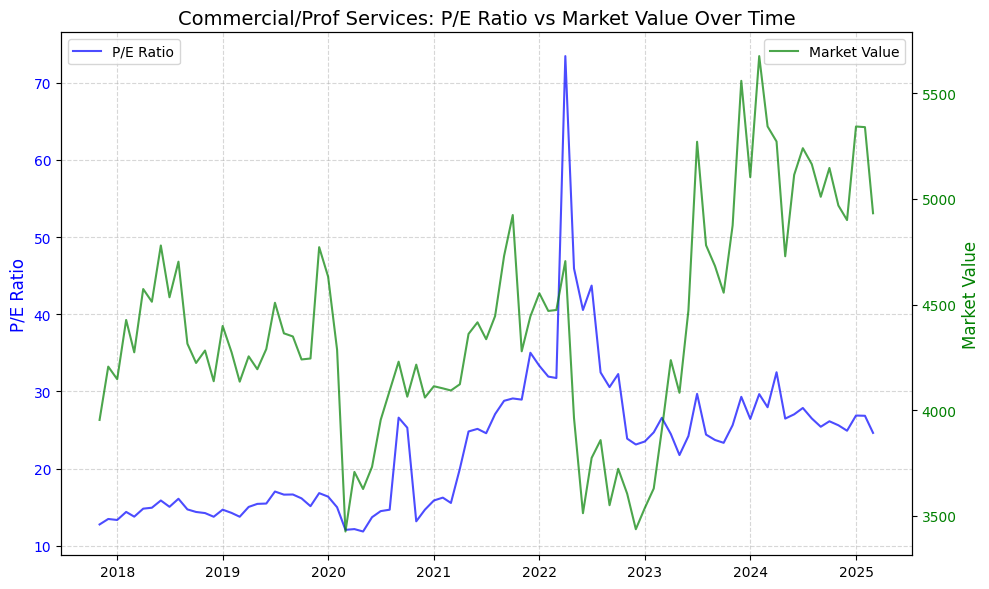

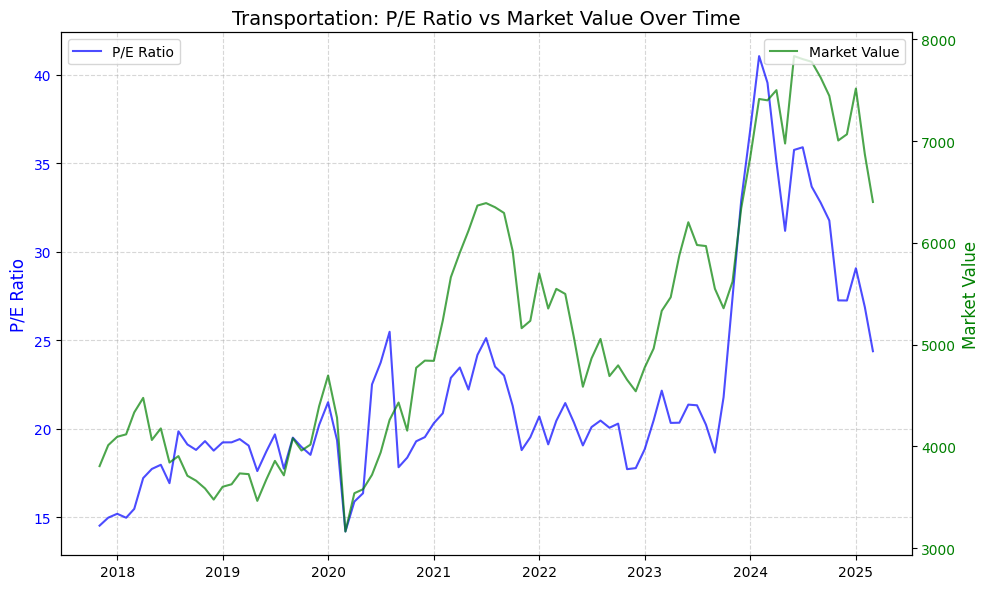

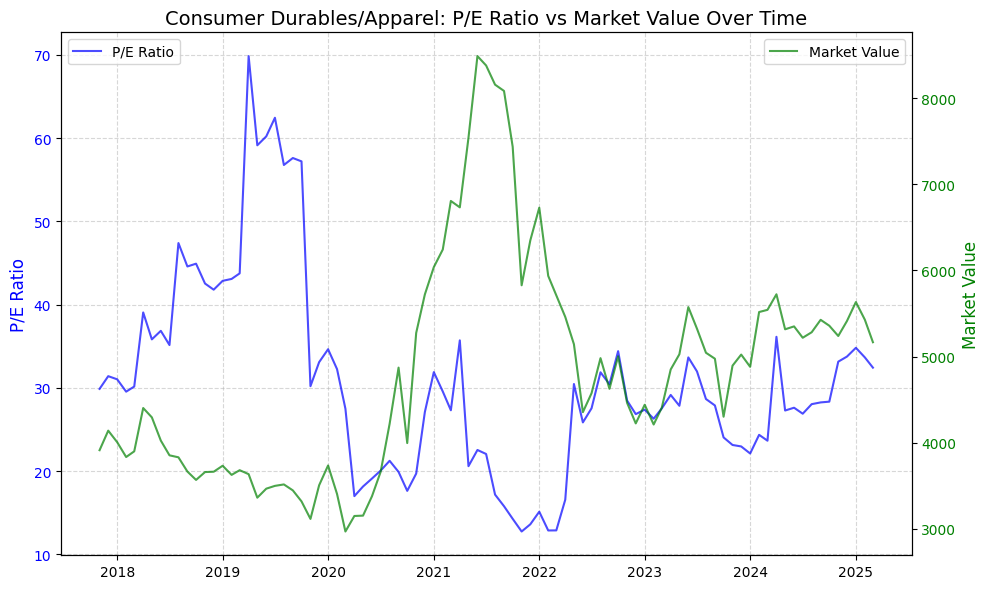

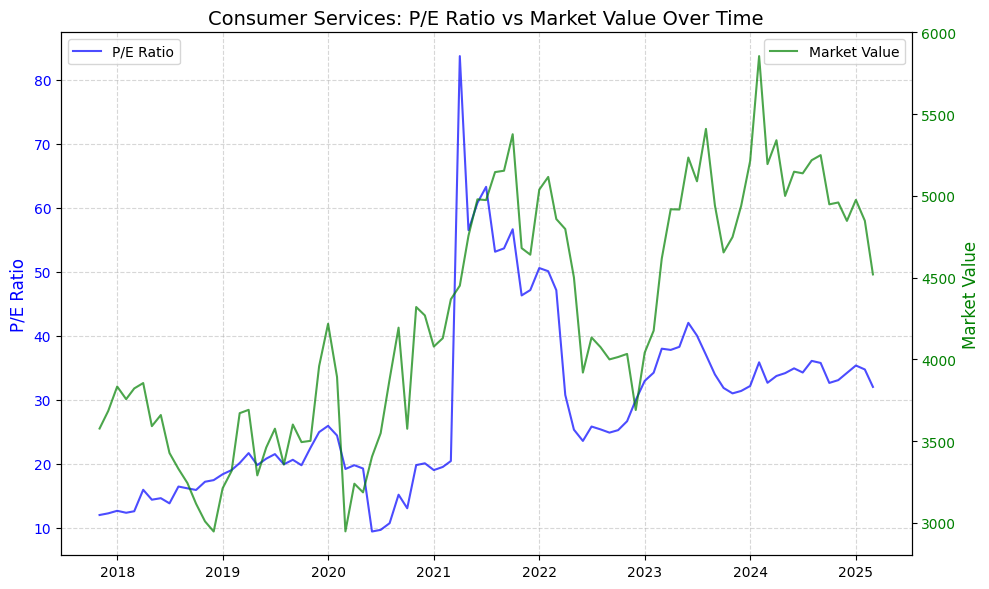

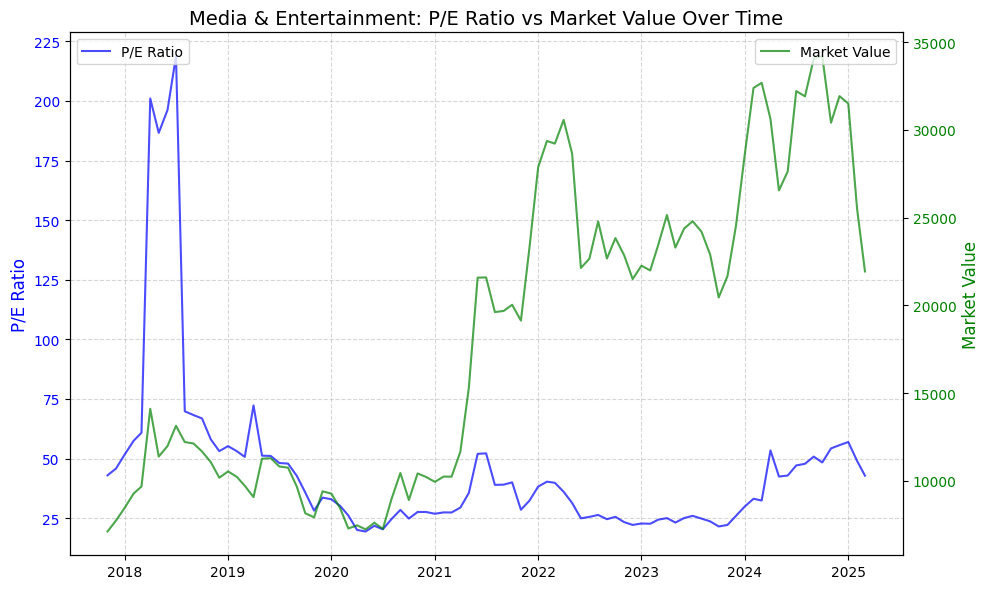

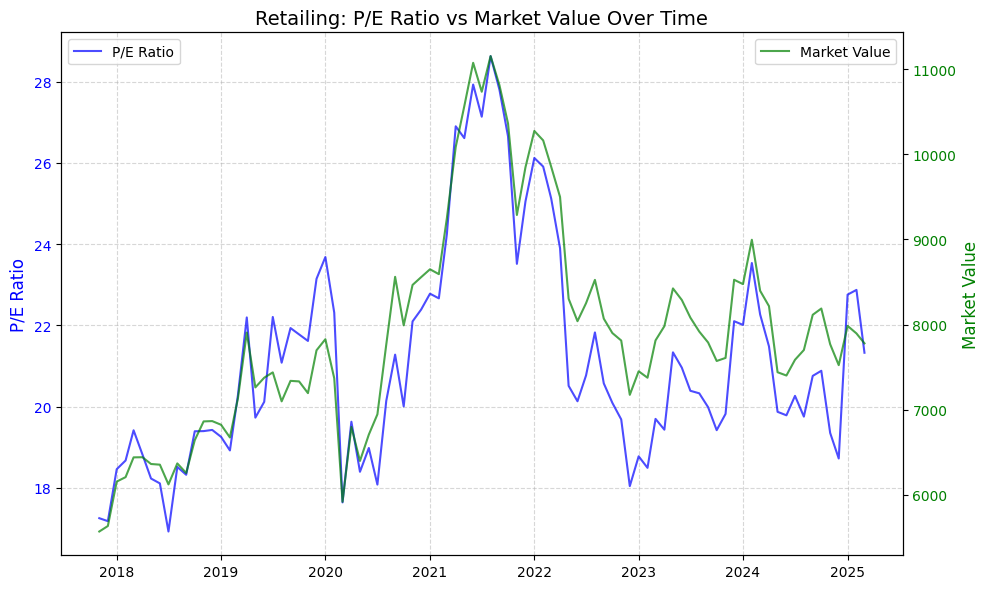

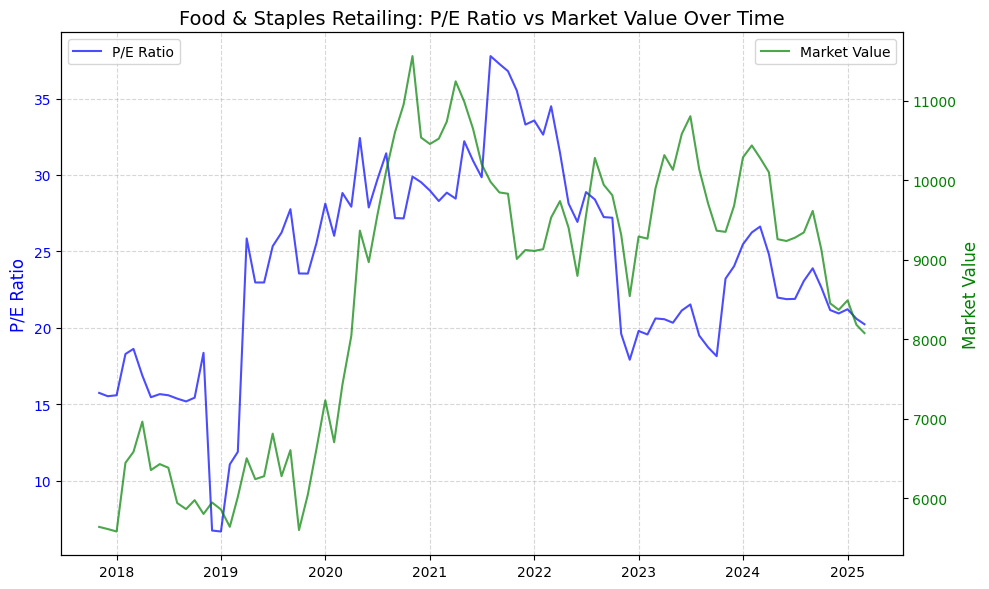

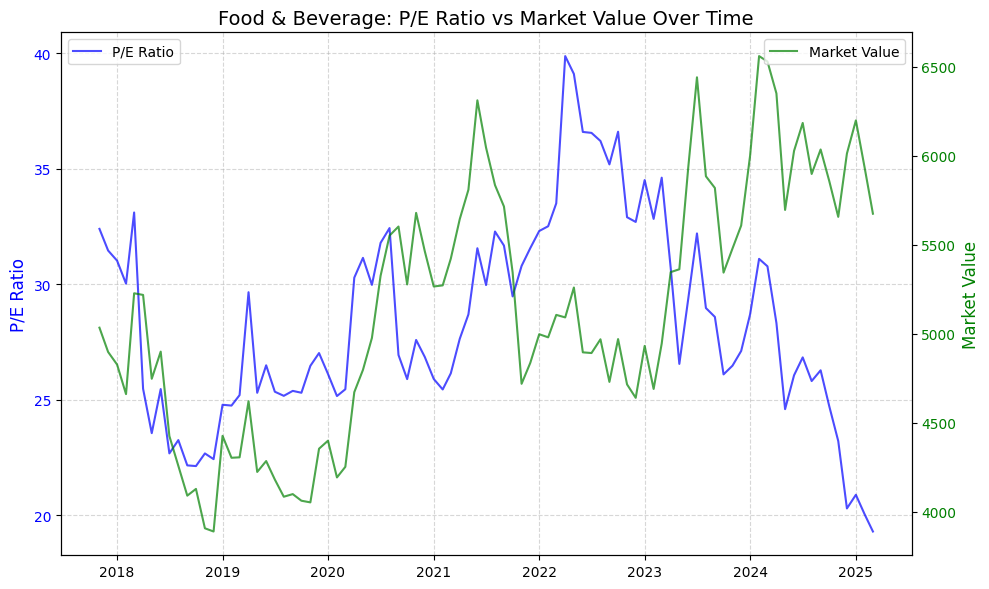

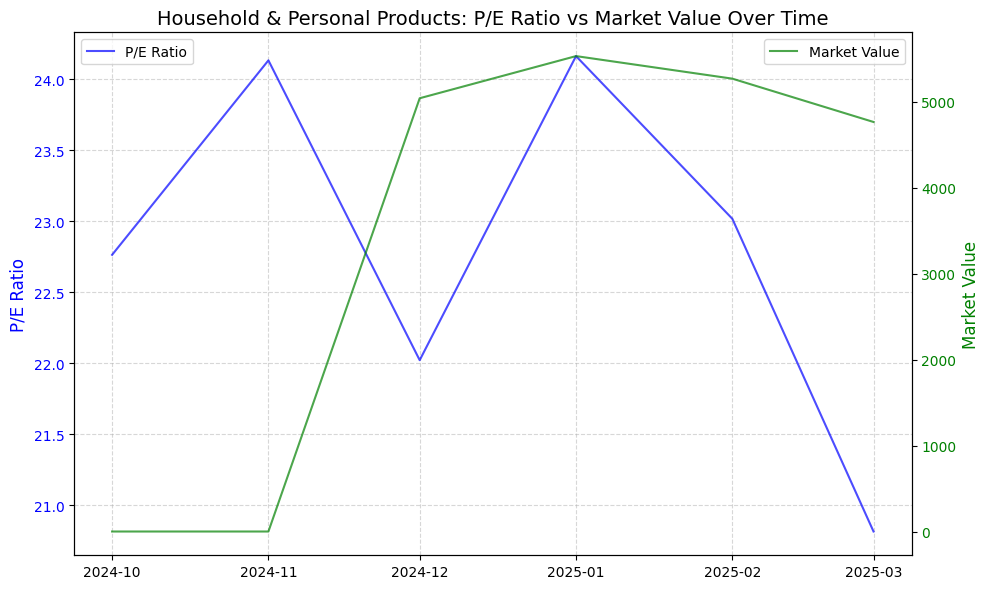

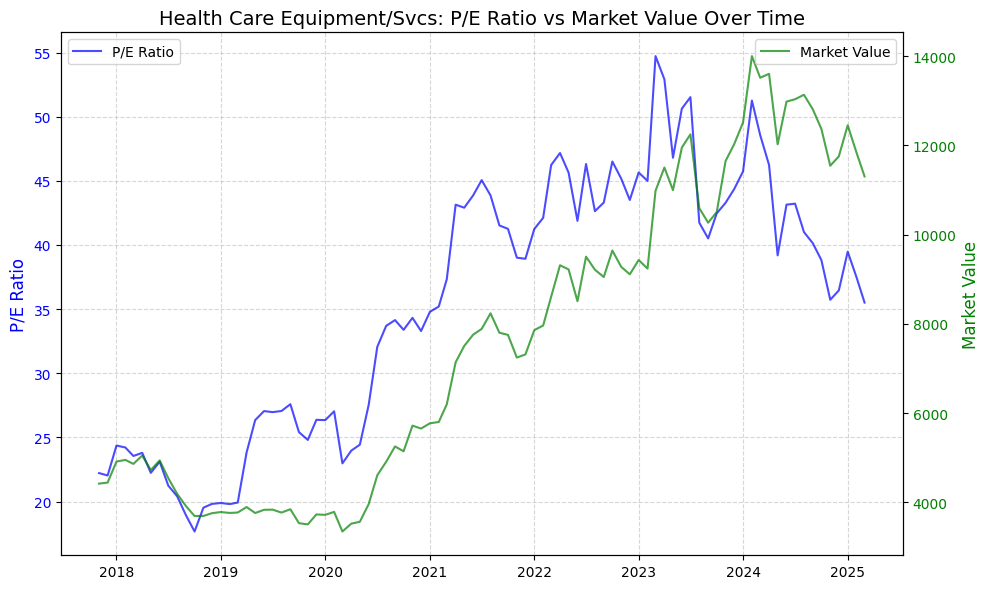

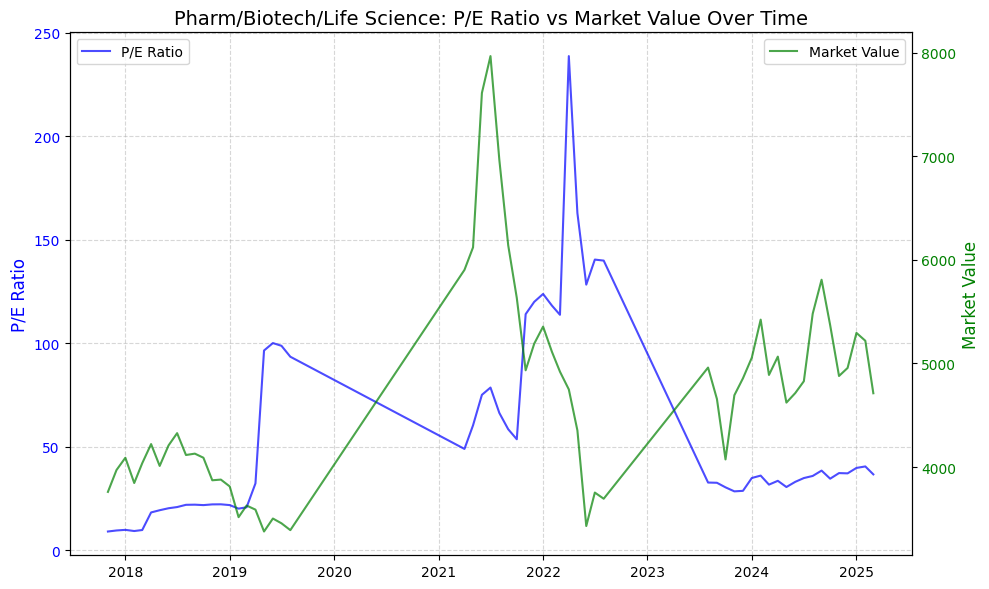

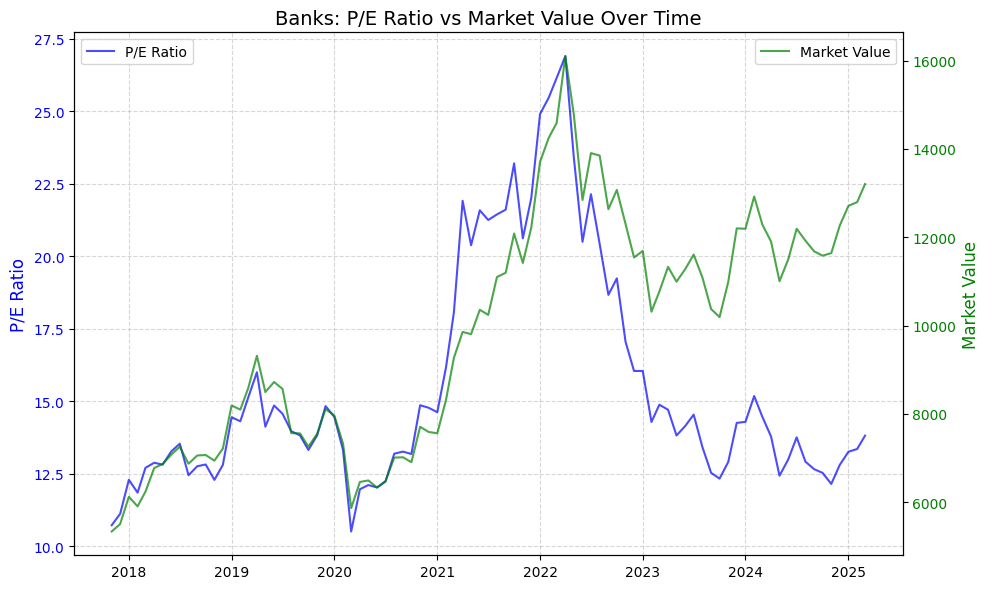

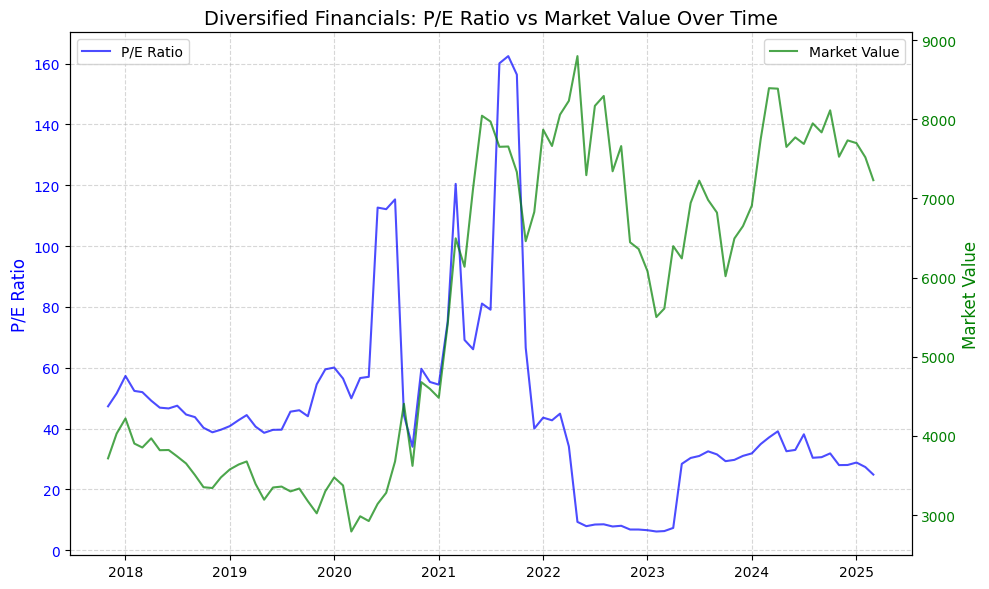

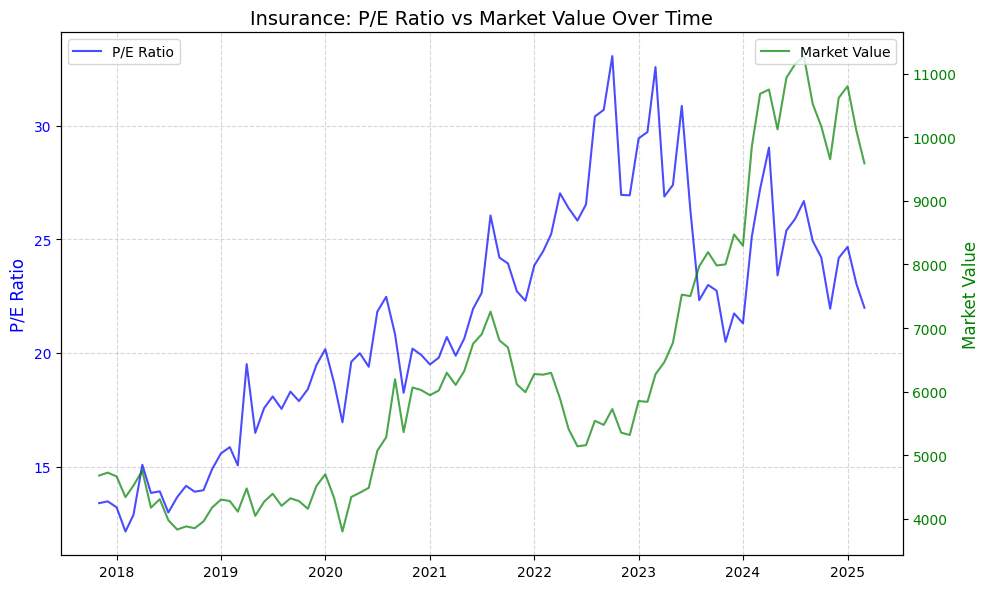

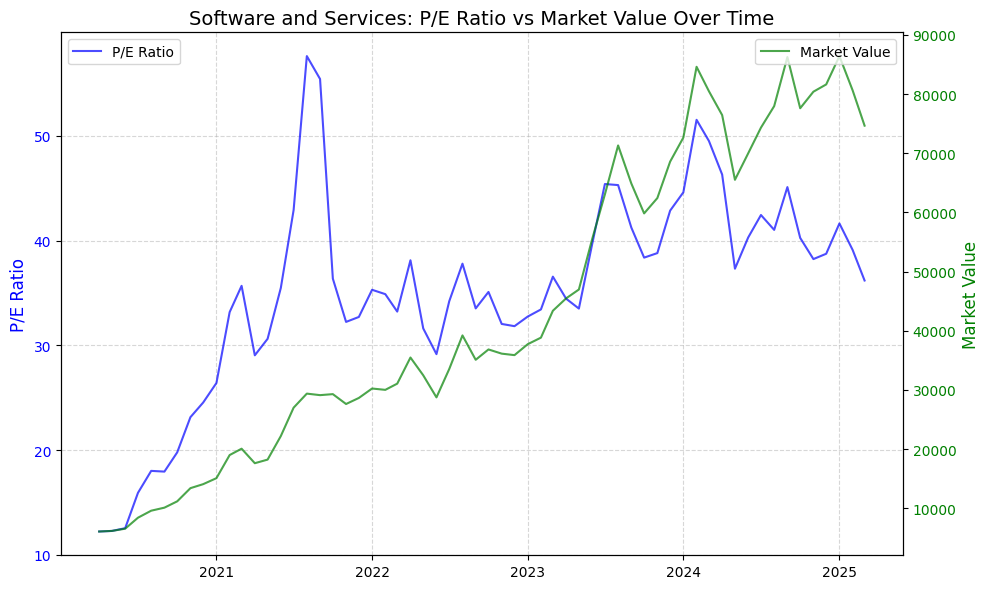

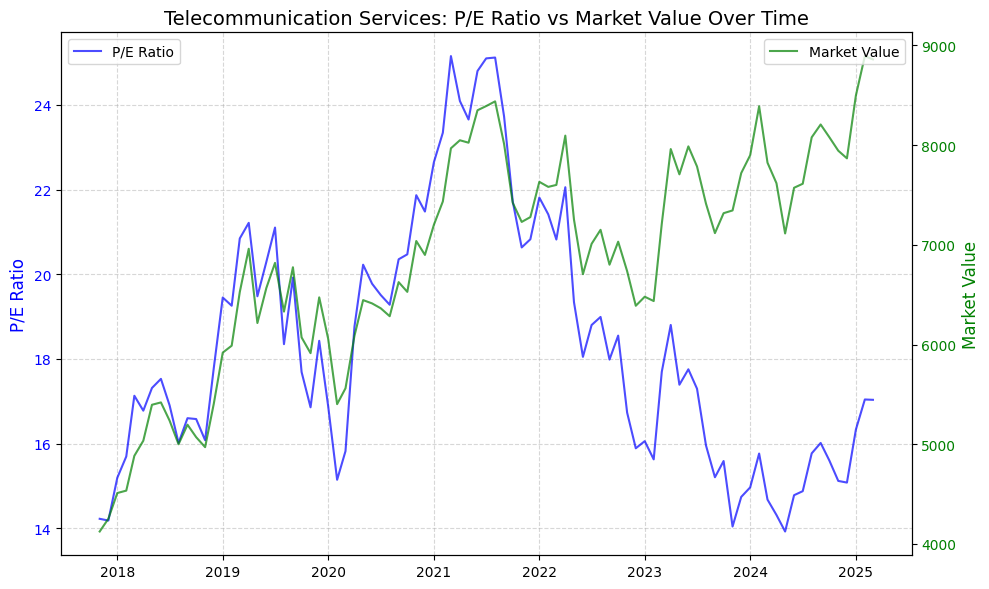

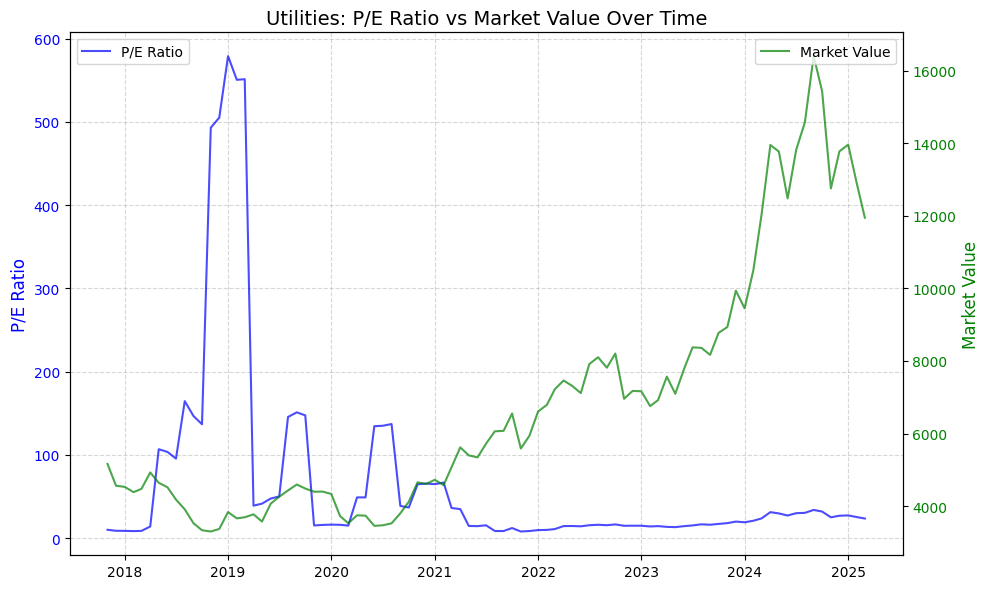

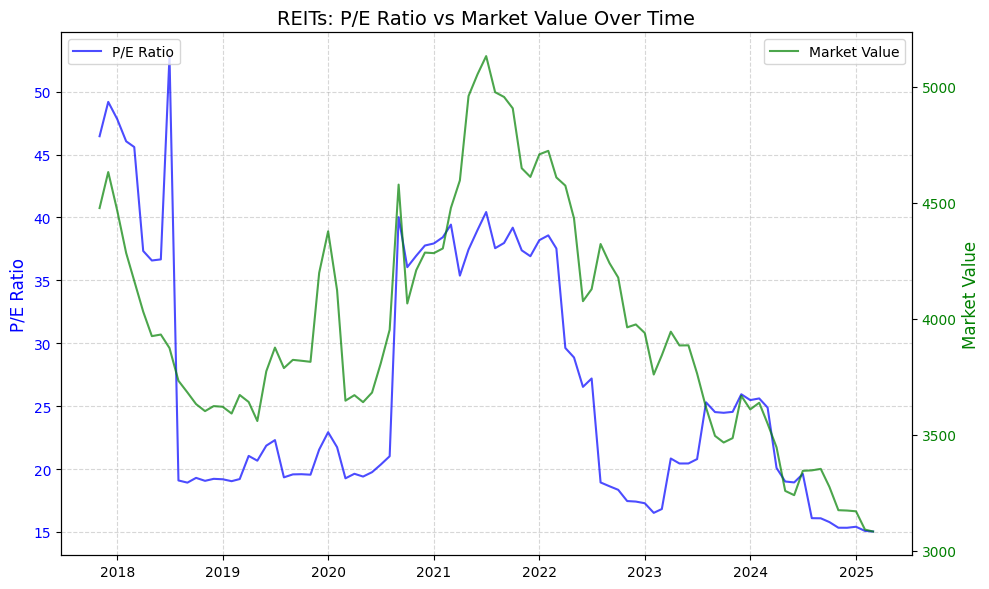

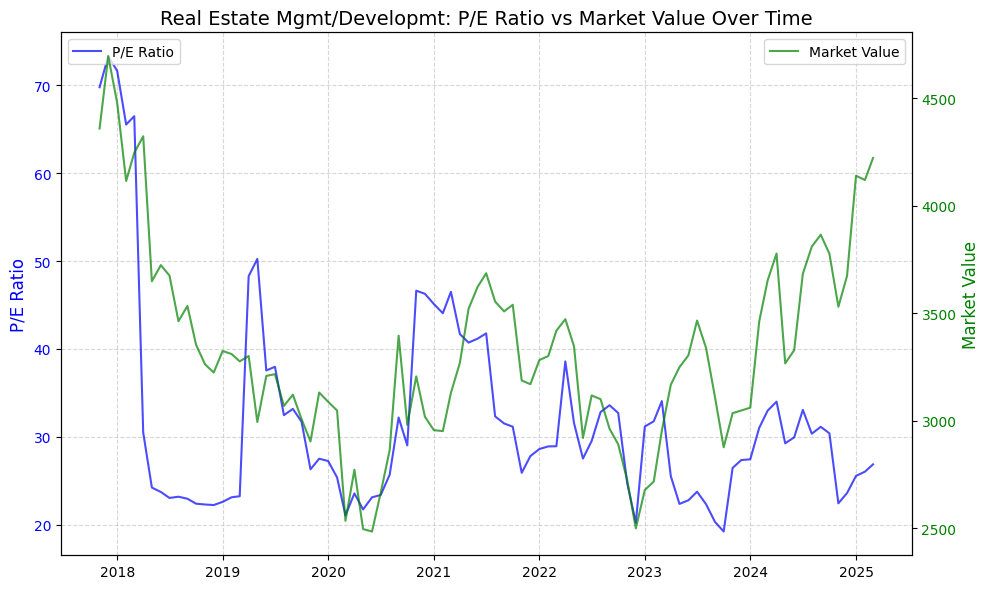

In [34]:
for pe_column, sector_column in column_mapping.items():
    # Drop rows with NaN values for accurate visualization
    subset = merged_data[['Date', pe_column, sector_column]].dropna()

    # Create the plot with dual y-axes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot P/E Ratio on the first y-axis (left)
    ax1.plot(subset['Date'], subset[pe_column], label="P/E Ratio", color="blue", alpha=0.7)
    ax1.set_ylabel("P/E Ratio", fontsize=12, color="blue")
    ax1.tick_params(axis='y', labelcolor="blue")
    ax1.grid(True, which="both", linestyle="--", alpha=0.5)

    # Create a second y-axis (right) for Market Value
    ax2 = ax1.twinx()
    ax2.plot(subset['Date'], subset[sector_column], label="Market Value", color="green", alpha=0.7)
    ax2.set_ylabel("Market Value", fontsize=12, color="green")
    ax2.tick_params(axis='y', labelcolor="green")

    # Add a title and x-axis label
    plt.title(f"{sector_column}: P/E Ratio vs Market Value Over Time", fontsize=14)
    plt.xlabel("Date", fontsize=12)

    # Add legends for both y-axes
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    # Tight layout for better spacing
    plt.tight_layout()
    plt.show()
